# Title: Prediction of Student's Performance Based on LA

In [1]:
#Import Libraries

import numpy as np
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


#Read Dataset
assessments= 'https://raw.githubusercontent.com/feizhi98/Project-1/main/assessments.csv'
ass= pd.read_csv(assessments)

course='https://raw.githubusercontent.com/feizhi98/Project-1/main/courses.csv'
courses=pd.read_csv(course)

studentAssessments= 'https://raw.githubusercontent.com/feizhi98/Project-1/main/studentAssessment.csv'
results=pd.read_csv(studentAssessments)

studentInformation='https://raw.githubusercontent.com/feizhi98/Project-1/main/studentInfo.csv'
studentInfo=pd.read_csv(studentInformation)

studentRegistration='https://raw.githubusercontent.com/feizhi98/Project-1/main/studentRegistration.csv'
reg=pd.read_csv(studentRegistration)

studentVle = "/Users/User/Downloads/Project1Dataset/studentVle.csv"
vle = pd.read_csv(studentVle)

material='https://raw.githubusercontent.com/feizhi98/Project-1/main/vle.csv'
materials=pd.read_csv(material)

# Part 1 - Data Exploration

### 1.1 Assessments

This file contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the assessments.csv contains columns: <br><br>
**code_module** – identification code of the module, to which the assessment belongs.<br>
**code_presentation** - identification code of the presentation, to which the assessment belongs.<br>
**id_assessment** – identification number of the assessment.<br>
**assessment_type** – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).<br>
**date** – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).<br>
**weight** - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

#### Print first 5 rows

In [2]:
ass.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


#### Print shape

In [3]:
ass.shape

(206, 6)

#### Print info

In [4]:
ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


#### Calculate for null values

In [5]:
ass.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

#### Count unique values of assessments

In [6]:
ass.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

Based on the info above, there are 7 different code_module, 6 code_presentation and 3 assessment_type. This may help to know which attributes should be used to group by in order to find the meaningful information.

#### Print unique values for code_module,code_presentation,assessment_type

In [7]:
print('code_module:',ass['code_module'].unique())
print('code_presentation:',ass['code_presentation'].unique())
print('assessment_type:',ass['assessment_type'].unique())

code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
code_presentation: ['2013J' '2014J' '2013B' '2014B']
assessment_type: ['TMA' 'Exam' 'CMA']


#### Check duplicated rows

In [8]:
ass[ass.duplicated()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight


#### Print total of assessments

In [9]:
ass.drop(['date','weight'],axis = 1).groupby(['code_module','assessment_type','code_presentation']).count()

id_assessment
code_module assessment_type code_presentation               
AAA         Exam            2013J                          1
                            2014J                          1
            TMA             2013J                          5
                            2014J                          5
BBB         CMA             2013B                          5
                            2013J                          5
                            2014B                          5
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          5
CCC         CMA             2014B                          4
                            2014J                          4
            Exam            2014B                          2
                            2014J                          2
            TMA             2014B                          4
                            2014J                          4
DDD         CMA             2013B                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          6
                            2013J                          6
                            2014B                          6
                            2014J                          6
EEE         Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          4
                            2014B                          4
                            2014J                          4
FFF         CMA             2013B                          7
                            2013J                          7
                            2014B                          7
                            2014J                          7
            Exam            2013B                          1
                            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013B                          5
                            2013J                          5
                            2014B                          5
                            2014J                          5
GGG         CMA             2013J                          6
                            2014B                          6
                            2014J                          6
            Exam            2013J                          1
                            2014B                          1
                            2014J                          1
            TMA             2013J                          3
                            2014B                          3
                            2014J                          3

#### Check assessments date and weight

In [10]:
ass.drop(['id_assessment'],axis = 1).groupby(['code_module','assessment_type','code_presentation']).agg(['min','max'])

date        weight       
                                                 min    max    min    max
code_module assessment_type code_presentation                            
AAA         Exam            2013J                NaN    NaN  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2013J               19.0  215.0   10.0   30.0
                            2014J               19.0  215.0   10.0   30.0
BBB         CMA             2013B               54.0  187.0    1.0    1.0
                            2013J               54.0  208.0    1.0    1.0
                            2014B               47.0  194.0    1.0    1.0
            Exam            2013B                NaN    NaN  100.0  100.0
                            2013J                NaN    NaN  100.0  100.0
                            2014B                NaN    NaN  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2013B               19.0  187.0    5.0   18.0
                            2013J               19.0  208.0    5.0   18.0
                            2014B               12.0  194.0    5.0   18.0
                            2014J               19.0  201.0    0.0   35.0
CCC         CMA             2014B               18.0  207.0    2.0    8.0
                            2014J               18.0  214.0    2.0    8.0
            Exam            2014B                NaN    NaN  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2014B               32.0  200.0    9.0   22.0
                            2014J               32.0  207.0    9.0   22.0
DDD         CMA             2013B               23.0  206.0    2.0    6.0
            Exam            2013B              240.0  240.0  100.0  100.0
                            2013J              261.0  261.0  100.0  100.0
                            2014B              241.0  241.0  100.0  100.0
                            2014J                NaN    NaN  100.0  100.0
            TMA             2013B               25.0  200.0    7.5   15.0
                            2013J               25.0  207.0   10.0   20.0
                            2014B               25.0  200.0   10.0   20.0
                            2014J               20.0  195.0    5.0   25.0
EEE         Exam            2013J              235.0  235.0  100.0  100.0
                            2014B              228.0  228.0  100.0  100.0
                            2014J              235.0  235.0  100.0  100.0
            TMA             2013J               33.0  159.0   16.0   28.0
                            2014B               33.0  152.0   16.0   28.0
                            2014J               33.0  166.0   16.0   28.0
FFF         CMA             2013B              222.0  222.0    0.0    0.0
                            2013J              236.0  236.0    0.0    0.0
                            2014B              227.0  227.0    0.0    0.0
                            2014J              241.0  241.0    0.0    0.0
            Exam            2013B              222.0  222.0  100.0  100.0
                            2013J              236.0  236.0  100.0  100.0
                            2014B              227.0  227.0  100.0  100.0
                            2014J              241.0  241.0  100.0  100.0
            TMA             2013B               19.0  166.0   12.5   25.0
                            2013J               19.0  173.0   12.5   25.0
                            2014B               24.0  171.0   12.5   25.0
                            2014J               24.0  199.0   12.5   25.0
GGG         CMA             2013J              229.0  229.0    0.0    0.0
                            2014B              222.0  222.0    0.0    0.0
                            2014J              229.0  229.0    0.0    0.0
            Exam            2013J              229.0

According to documentation, exams have weight 100, and all the total weight of other assessments is 100. However, this is not valid for all courses. In course GGG, only exams have weight. Additionally, course GGG has all CMAs on the same date. Course GGG is also abnormal in term of assignment date: all the other courses have first assignment within the first 30 days, but first assignment for course G is on day 61. Final exam dates are missing, but this can be collected from the courses.csv dataset. The imbalance weight will be solved by reassigning a new weight which will be conducted at pre-processing part.

### 1.2 StudentAssessments

This file contains the results of students’ assessments. If the student does not submit the assessment, no result is recorded. The final exam submissions is missing, if the result of the assessments is not stored in the system. This file contains the following columns:<br><br>
**id_assessment** – the identification number of the assessment.<br>
**id_student** – a unique identification number for the student.<br>
**date_submitted** – the date of student submission, measured as the number of days since the start of the module presentation.<br>
**is_banked** – a status flag indicating that the assessment result has been transferred from a previous presentation.<br>
**score** – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

#### Print first 5 rows

In [11]:
results.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


#### Print shape

In [12]:
results.shape

(173912, 5)

#### Print info

In [13]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


#### Check null values

In [14]:
results.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

#### Count unique values of results

In [15]:
results.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

#### Check duplicated rows

In [16]:
results[results.duplicated()]

,id_assessment,id_student,date_submitted,is_banked,score


### 1.3 Vle

The csv file contains information about the available materials in the VLE. Typically these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded. The vle.csv file contains the following columns:<br><br>
**id_site** – an identification number of the material.<br>
**code_module** – an identification code for module.<br>
**code_presentation** - the identification code of presentation.<br>
**activity_type** – the role associated with the module material.<br>
**week_from** – the week from which the material is planned to be used.<br>
**week_to** – week until which the material is planned to be used.

#### Print first 5 rows

In [17]:
materials.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


#### Print shape

In [18]:
materials.shape

(6364, 6)

#### Print info

In [19]:
materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


#### Check null values

In [20]:
materials.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

#### Check unique values

In [21]:
materials.nunique()

id_site              6364
code_module             7
code_presentation       4
activity_type          20
week_from              30
week_to                30
dtype: int64

#### Check duplicated rows

In [22]:
materials[materials.duplicated()]

,id_site,code_module,code_presentation,activity_type,week_from,week_to


### 1.4 StudentVle

The studentVle.csv file contains information about each student’s interactions with the materials in the VLE. This file contains the following columns:<br><br>
**code_module** – an identification code for a module.<br>
**code_presentation** - the identification code of the module presentation.<br>
**id_student** – a unique identification number for the student.<br>
**id_site** - an identification number for the VLE material.<br>
**date** – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.<br>
**sum_click** – the number of times a student interacts with the material in that day.

#### Print first 5 rows

In [23]:
vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


#### Print shape

In [24]:
vle.shape

(10655280, 6)

#### Print info

In [25]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


#### Check null values

In [26]:
vle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

#### Check unique values

In [27]:
vle.nunique()

code_module              7
code_presentation        4
id_student           26074
id_site               6268
date                   295
sum_click              498
dtype: int64

#### Check duplicated rows

In [28]:
vle[vle.duplicated()].head()

,code_module,code_presentation,id_student,id_site,date,sum_click
2,AAA,2013J,28400,546652,-10,1
63,AAA,2013J,45462,546652,-10,1
180,AAA,2013J,77367,546652,-10,4
193,AAA,2013J,94961,546652,-10,2
442,AAA,2013J,248270,546652,-10,4


#### Track the average of students that access VLE activity

In [29]:
avg_per_site=vle.groupby(["id_student","id_site","code_module","code_presentation"]).mean().reset_index()
avg_per_site.head()

,id_student,id_site,code_module,code_presentation,date,sum_click
0,6516,877011,AAA,2014J,210.333333,3.833333
1,6516,877012,AAA,2014J,90.833333,2.310606
2,6516,877015,AAA,2014J,113.461538,2.000000
3,6516,877023,AAA,2014J,122.666667,2.000000
4,6516,877025,AAA,2014J,41.142857,4.333333


### 1.5 Courses

File contains the list of all available modules and their presentations. The columns are:<br><br>
**code_module** – code name of the module, which serves as the identifier.<br>
**code_presentation** – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.<br>
**length** - length of the module-presentation in days.

#### Print first 5 rows

In [30]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


#### Print shape

In [31]:
courses.shape

(22, 3)

#### Print info

In [32]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


#### Check null values

In [33]:
courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

#### Count unique values of courses

In [34]:
courses.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

#### Print unique values of code_module, code_presentation, module_presentation_length

In [35]:
print('code_module:',courses['code_module'].unique())
print('code_presentation:',courses['code_presentation'].unique())
print('module_presentation_length:',courses['module_presentation_length'].unique())

code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
code_presentation: ['2013J' '2014J' '2013B' '2014B']
module_presentation_length: [268 269 262 240 234 241 261]


#### Check duplicated rows

In [36]:
courses[courses.duplicated()]

,code_module,code_presentation,module_presentation_length


#### Print module_presentation_length

In [37]:
courses.groupby(['code_module','code_presentation']).agg(['min','max'])

module_presentation_length     
                                                     min  max
code_module code_presentation                                
AAA         2013J                                    268  268
            2014J                                    269  269
BBB         2013B                                    240  240
            2013J                                    268  268
            2014B                                    234  234
            2014J                                    262  262
CCC         2014B                                    241  241
            2014J                                    269  269
DDD         2013B                                    240  240
            2013J                                    261  261
            2014B                                    241  241
            2014J                                    262  262
EEE         2013J                                    268  268
            2014B                                    241  241
            2014J                                    269  269
FFF         2013B                                    240  240
            2013J                                    268  268
            2014B                                    241  241
            2014J                                    269  269
GGG         2013J                                    261  261
            2014B                                    241  241
            2014J                                    269  269

Generally, February semesters are typically 20 days shorter than October ones. Some courses (C,E,G) don't have data for both 2013 and 2014.

### 1.6 StudentInfo

This file contains demographic information about the students together with their results. File contains the following columns:<br><br>
**code_module** – an identification code for a module on which the student is registered.<br>
**code_presentation** - the identification code of the presentation during which the student is registered on the module.<br>
**id_student** – a unique identification number for the student.<br>
**gender** – the student’s gender.<br>
**region** – identifies the geographic region, where the student lived while taking the module-presentation.<br>
**highest_education** – highest student education level on entry to the module presentation.<br>
**imd_band** – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.<br>
**age_band** – band of the student’s age.<br>
**num_of_prev_attempts** – the number times the student has attempted this module.<br>
**studied_credits** – the total number of credits for the modules the student is currently studying.<br>
**disability** – indicates whether the student has declared a disability.<br>
**final_result** – student’s final result in the module-presentation.

#### Print first 5 rows

In [38]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


#### Print shape

In [39]:
studentInfo.shape

(32593, 12)

#### Print info

In [40]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


#### Check null values

In [41]:
studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

#### Count unique values of studentInfo

In [42]:
studentInfo.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

#### Check duplicated rows

In [43]:
studentInfo[studentInfo.duplicated()]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result


### 1.7 StudentRegistration

This file contains information about the time when the student registered for the module presentation. For students who unregistered the date of unregistration is also recorded. File contains five columns:<br><br>
**code_module** – an identification code for a module.<br>
**code_presentation** - the identification code of the presentation.<br>
**id_student** – a unique identification number for the student.<br>
**date_registration** – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).<br>
**date_unregistration** – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

#### Print first 5 rows

In [44]:
reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


#### Print shape

In [45]:
reg.shape

(32593, 5)

#### Print info

In [46]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


#### Check null values

In [47]:
reg.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

#### Counts unique values of registration

In [48]:
reg.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

#### Check for duplicated rows

In [49]:
reg[reg.duplicated()]

,code_module,code_presentation,id_student,date_registration,date_unregistration


#### Create function to compare Columns

In [50]:
def compareColumns(df1, df2):

    df1Columns = df1.columns.values.tolist()
    df2Columns = df2.columns.values.tolist()

    diffDict = set(df1Columns) & set(df2Columns)
    
    print('Shared columns : ', diffDict, '\n')

    diffList = list(diffDict)
    for col in diffList:
        x = df1[col].isin(df2[col]).value_counts()
        print('Check if values are present in both dataframes:')
        print(x, '\n')

#### Check the registered students with results

Check if all id_student recorded in the registration table are recorded in the results table.

In [51]:
compareColumns(reg, results)

Shared columns :  {'id_student'} 

Check if values are present in both dataframes:
True     26746
False     5847
Name: id_student, dtype: int64 



There are 5847 registered students missing from the results table.

#### Check the studentInfo with results

In [52]:
compareColumns(studentInfo, results)

Shared columns :  {'id_student'} 

Check if values are present in both dataframes:
True     26746
False     5847
Name: id_student, dtype: int64 



Same as above, there are 5847 students missing from the results table.

#### Create function to compare list of registration and studentInfo

In [53]:
df1_IDs = reg['id_student'].unique()
df2_IDs = studentInfo['id_student'].unique()

a = set(df1_IDs)  
b = set(df2_IDs)  
  
if a == b:  
    print("The id_student in registration and studentInfo are equal.")  
else:  
    print("The id_student in registration and studentInfo are not equal.") 

The id_student in registration and studentInfo are equal.


#### Check the reg with studentInfo

In [54]:
compareColumns(reg, studentInfo)

Shared columns :  {'code_presentation', 'id_student', 'code_module'} 

Check if values are present in both dataframes:
True    32593
Name: code_presentation, dtype: int64 

Check if values are present in both dataframes:
True    32593
Name: id_student, dtype: int64 

Check if values are present in both dataframes:
True    32593
Name: code_module, dtype: int64 



Based on the results above, they are same students who did not have a results at the end of the semester.

#### Create function to print different values

In [55]:
def printDiffValues(df1, df2, col):

    df1_IDs = df1[col].unique()
    df2_IDs = df2[col].unique()

    diff = set(df1_IDs).difference(set(df2_IDs))
    

    missingList = list(diff)

    missingDf = df1[df1[col].isin(missingList)]

    return missingDf

#### Print first 5 registered students who did not have records in results

In [56]:
info_not_in_results = printDiffValues(studentInfo, results, 'id_student')
info_not_in_results.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
44,AAA,2013J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,0,180,N,Withdrawn
118,AAA,2013J,281589,M,North Western Region,HE Qualification,30-40%,0-35,0,60,N,Fail
125,AAA,2013J,292923,F,South East Region,A Level or Equivalent,90-100%,35-55,0,180,N,Withdrawn
136,AAA,2013J,305539,F,Wales,Lower Than A Level,80-90%,0-35,0,120,N,Withdrawn


#### Count for the final result of the no records students

In [57]:
from collections import Counter

drop_out_final_results=info_not_in_results['final_result']

c = Counter(drop_out_final_results)

print( c.items() )

dict_items([('Withdrawn', 4648), ('Fail', 1197), ('Pass', 2)])


There are 2 no records students pass the exam. It is an unusual situation.

#### Compare number of withdrawn and unregistered students

In [58]:
reg_not_in_results = printDiffValues(reg, results, 'id_student')
reg_not_in_results.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
2,AAA,2013J,30268,-92.0,12.0
44,AAA,2013J,135335,-29.0,30.0
118,AAA,2013J,281589,-50.0,NaN
125,AAA,2013J,292923,-162.0,-121.0
136,AAA,2013J,305539,-54.0,-3.0


In [59]:
reg_not_in_results['date_unregistration'].notnull().sum()

4594

There are 4594 students unregistered, but the withdrawn students recorded 4648.There are 54 students records missing.

#### Check no record students who pass the exams

In [60]:
info_not_in_results[info_not_in_results['final_result'] == 'Pass']

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
645,AAA,2014J,1336190,M,London Region,HE Qualification,80-90%,55<=,0,60,N,Pass
12893,CCC,2014J,1777834,F,East Anglian Region,A Level or Equivalent,80-90%,35-55,0,60,N,Pass


#### Find unregistration date of these two students

In [61]:
reg_not_in_results[reg_not_in_results['id_student'] == 1336190]

,code_module,code_presentation,id_student,date_registration,date_unregistration
645,AAA,2014J,1336190,-23.0,NaN


In [62]:
reg_not_in_results[reg_not_in_results['id_student'] == 1777834]

,code_module,code_presentation,id_student,date_registration,date_unregistration
12893,CCC,2014J,1777834,NaN,NaN


There is no record for their date_unregistration, hence the data might be not 100% reliable as mentioned in challenges.

# Part 2 - Data Pre-processing

### Assessments

#### Task 1:Convert datatype of id_assessment

#### Check datatypes of assessment

In [63]:
ass.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

#### Convert datatype of id_assessment from integer to object

In [64]:
ass['id_assessment'] = ass['id_assessment'].astype(object)

#Check again dtypes
ass.dtypes

code_module           object
code_presentation     object
id_assessment         object
assessment_type       object
date                 float64
weight               float64
dtype: object

#### Task 2: Assign new weight for assessment to solve marks distribution imbalanced problem

#### Calculate total amount of other assessments by module

In [65]:
exams=ass[ass["assessment_type"]=="Exam"]
others=ass[ass["assessment_type"]!="Exam"]
amounts=others.groupby(["code_module","code_presentation"]).count()["id_assessment"] 
amounts=amounts.reset_index()
amounts.head(5)

,code_module,code_presentation,id_assessment
0,AAA,2013J,5
1,AAA,2014J,5
2,BBB,2013B,11
3,BBB,2013J,11
4,BBB,2014B,11


#### Calculate the weight of assessments

As mentioned in above, exams are treated separately and have the weight 100%; the sum of all other assessments is 100%. It means that the total of other assessments will be summed up. Let's check the total weight of other assessments by using group by function.

In [66]:
ass\
.groupby(['code_module','code_presentation'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

Based on the results above, module CCC has weight of 300 which is more 100 than expected. While module GGG has only 100 weight which is less 100 than expected.

#### Calculate the weight of the exam assessment_type

In [67]:
ass[ass['assessment_type'] == 'Exam']\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation assessment_type              
AAA         2013J             Exam                    100.0
            2014J             Exam                    100.0
BBB         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
CCC         2014B             Exam                    200.0
            2014J             Exam                    200.0
DDD         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
EEE         2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
FFF         2013B             Exam                    100.0
            2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0
GGG         2013J             Exam                    100.0
            2014B             Exam                    100.0
            2014J             Exam                    100.0

As mentioned above, all exam will have a weight of exactly 100. However, module CCC has weight of 200. Now, we have to check on the times of exam for each module.

#### Calculate how many times of exam for each module

In [68]:
ass[ass['assessment_type'] == 'Exam'][['code_module', 'code_presentation', 'id_assessment']]\
.groupby(['code_module', 'code_presentation'])\
.count()

id_assessment
code_module code_presentation               
AAA         2013J                          1
            2014J                          1
BBB         2013B                          1
            2013J                          1
            2014B                          1
            2014J                          1
CCC         2014B                          2
            2014J                          2
DDD         2013B                          1
            2013J                          1
            2014B                          1
            2014J                          1
EEE         2013J                          1
            2014B                          1
            2014J                          1
FFF         2013B                          1
            2013J                          1
            2014B                          1
            2014J                          1
GGG         2013J                          1
            2014B                          1
            2014J                          1

Based on the table above, we get to know there are two exams for module CCC.

#### Calculate the weight of non-exam type of assessment

In [69]:
ass[ass['assessment_type'] != 'Exam']\
.groupby(['code_module', 'code_presentation'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     100.0
            2014J                     100.0
BBB         2013B                     100.0
            2013J                     100.0
            2014B                     100.0
            2014J                     100.0
CCC         2014B                     100.0
            2014J                     100.0
DDD         2013B                     100.0
            2013J                     100.0
            2014B                     100.0
            2014J                     100.0
EEE         2013J                     100.0
            2014B                     100.0
            2014J                     100.0
FFF         2013B                     100.0
            2013J                     100.0
            2014B                     100.0
            2014J                     100.0
GGG         2013J                       0.0
            2014B                       0.0
            2014J                       0.0

Module GGG does not have any assessments that are not exam type.

#### Print weight for all assignment of module GGG

In [70]:
ass[ass['code_module'] == 'GGG']\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.agg(weight_by_type = ('weight', sum))

weight_by_type
code_module code_presentation assessment_type                
GGG         2013J             CMA                         0.0
                              Exam                      100.0
                              TMA                         0.0
            2014B             CMA                         0.0
                              Exam                      100.0
                              TMA                         0.0
            2014J             CMA                         0.0
                              Exam                      100.0
                              TMA                         0.0

Based on the results above, there is no other assessments wight rather than exam type. Hence, it will cause 0 weight for "other_assessements".

#### Check any other module that have weight of 0 for "other assessments"

#### CMA

In [71]:
ass[(ass['assessment_type'] == 'CMA') & (ass['weight'] == 0) 
    & (ass['code_module'] != 'GGG')]['weight'].count()

28

#### TMA

In [72]:
ass[(ass['assessment_type'] == 'TMA') & (ass['weight'] == 0) 
    & (ass['code_module'] != 'GGG')]['weight'].count()

1

In other modules except from module GGG, there are 28 CMA assessment type weight 0 and 1 for TMA.

#### Print total times of exams for module GGG

In [73]:
ass[ass['code_module'] == 'GGG'][['code_module', 'code_presentation', 'assessment_type', 'id_assessment']]\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.count()

id_assessment
code_module code_presentation assessment_type               
GGG         2013J             CMA                          6
                              Exam                         1
                              TMA                          3
            2014B             CMA                          6
                              Exam                         1
                              TMA                          3
            2014J             CMA                          6
                              Exam                         1
                              TMA                          3

#### Assign weight for TMA and CMA

Since the CMA tends to 0, hence assignment 100% to TMA.

In [74]:
#Divide 100 with 3 since there are 3 TMA
ass.loc[(ass.code_module=='GGG') & (ass.assessment_type=='TMA'),'weight'] = (100/3)
ass.loc[(ass.code_module=='GGG') & (ass.assessment_type=='CMA'),'weight'] = (0)

#Check the new weight for module GGG after assign
ass[ass['code_module'] == 'GGG']\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.agg(weight_by_type = ('weight', sum))

weight_by_type
code_module code_presentation assessment_type                
GGG         2013J             CMA                         0.0
                              Exam                      100.0
                              TMA                       100.0
            2014B             CMA                         0.0
                              Exam                      100.0
                              TMA                       100.0
            2014J             CMA                         0.0
                              Exam                      100.0
                              TMA                       100.0

#### Print the weight of assessment

In [75]:
ass\
.groupby(['code_module','code_presentation'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     200.0
            2014B                     200.0
            2014J                     200.0

As we can see, the weight for GGG is 200 now while CCC remains 300. To make the calculation fair, the weight for exam will be assigned as 100/2 since there are two exams.

#### Counts for assessments of module CCC

In [76]:
ass[ass['code_module'] == 'CCC'][['code_module', 'code_presentation', 'assessment_type', 'id_assessment']]\
.groupby(['code_module','code_presentation', 'assessment_type'])\
.count()

id_assessment
code_module code_presentation assessment_type               
CCC         2014B             CMA                          4
                              Exam                         2
                              TMA                          4
            2014J             CMA                          4
                              Exam                         2
                              TMA                          4

#### Assign new weight for module CCC

In [77]:
#Divide 100 with 2 since there are 2 exams
ass.loc[(ass.code_module=='CCC') & (ass.assessment_type=='Exam'),'weight'] = (100/2)

#Print new weight
ass\
.groupby(['code_module','code_presentation'])\
.agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     200.0
            2014J                     200.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     200.0
            2014B                     200.0
            2014J                     200.0

Now, the weights for all modules are balanced.

### StudentAssessment

#### Task 1:Convert datatype of id_assessment and id_student

#### Check datatypes of StudentAssessment

In [78]:
results.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

#### Convert id_assessment and id_student from integer to object type

In [79]:
results['id_assessment'] = results['id_assessment'].astype(object)
results['id_student'] = results['id_student'].astype(object)

#Check again dtypes
results.dtypes

id_assessment      object
id_student         object
date_submitted      int64
is_banked           int64
score             float64
dtype: object

#### Task 2: Drop null values

#### Check null values

In [80]:
results.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

There are 173 data have null values for score. Based on the explanation in the section above, for the student who did not submit assessment, no result is recorded. Thus, just drop the NaN for the score since no submissions from the students.

#### Print null values of score

In [81]:
results[results['score'].isnull()]

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


#### Drop null columns  

In [82]:
results = results.dropna()

results[results['score'].isnull()]

,id_assessment,id_student,date_submitted,is_banked,score


In [83]:
results.shape

(173739, 5)

### Vle

#### Task 1:Convert datatype of id_site

#### Check dataypes of Vle

In [84]:
materials.dtypes

id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object

#### Convert datatype of id_site to object

In [85]:
materials['id_site'] = materials['id_site'].astype(object)

#Check again dtypes
materials.dtypes

id_site               object
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object

### StudentVle

#### Task 1: Convert datatypes of id_student & id_site

#### Check datatypes of StudentVle

In [86]:
vle.dtypes

code_module          object
code_presentation    object
id_student            int64
id_site               int64
date                  int64
sum_click             int64
dtype: object

#### Convert id_student from integer to object

In [87]:
vle['id_student'] = vle['id_student'].astype(object)
vle['id_site'] = vle['id_site'].astype(object)

#Check again dtypes
vle.dtypes

code_module          object
code_presentation    object
id_student           object
id_site              object
date                  int64
sum_click             int64
dtype: object

### StudentInfo

#### Task 1: Convert datatype of id_students

#### Check dtypes of studentInfo

In [88]:
studentInfo.dtypes

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

#### Convert id_student from integer to object type

In [89]:
studentInfo['id_student'] = studentInfo['id_student'].astype(object)

#Check again dtypes
studentInfo.dtypes

code_module             object
code_presentation       object
id_student              object
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

#### Task 2: Replace null values

#### Check null values

In [90]:
studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

#### Fill null values of imd_band with NaN

In [91]:
studentInfo['imd_band'].fillna('NaN', inplace=True)

studentInfo.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

### StudentRegistration

#### Task 1: Convert datatype of id_student

#### Check datatypes of StudentRegistration

In [92]:
reg.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

#### Convert id_student from integer to object type

In [93]:
reg['id_student'] = reg['id_student'].astype(object)

#Check again dtypes
reg.dtypes

code_module             object
code_presentation       object
id_student              object
date_registration      float64
date_unregistration    float64
dtype: object

#### Add new column of withdrawn status 

1=withdrawn<br>
0=completed

In [94]:
reg['WithdrawnStatus'] = ['0' if pd.isnull(days) else '1' for days in reg['date_unregistration']]
reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,WithdrawnStatus
0,AAA,2013J,11391,-159.0,NaN,0
1,AAA,2013J,28400,-53.0,NaN,0
2,AAA,2013J,30268,-92.0,12.0,1
3,AAA,2013J,31604,-52.0,NaN,0
4,AAA,2013J,32885,-176.0,NaN,0


In [95]:
reg['date_registration'] = reg['date_registration'].fillna(0).astype(float).apply(abs)
reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,WithdrawnStatus
0,AAA,2013J,11391,159.0,NaN,0
1,AAA,2013J,28400,53.0,NaN,0
2,AAA,2013J,30268,92.0,12.0,1
3,AAA,2013J,31604,52.0,NaN,0
4,AAA,2013J,32885,176.0,NaN,0


#### Fill null values of date_unregistration with 0

In [96]:
reg['date_unregistration'] = reg['date_unregistration'].fillna(0).astype(float).apply(abs)
reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,WithdrawnStatus
0,AAA,2013J,11391,159.0,0.0,0
1,AAA,2013J,28400,53.0,0.0,0
2,AAA,2013J,30268,92.0,12.0,1
3,AAA,2013J,31604,52.0,0.0,0
4,AAA,2013J,32885,176.0,0.0,0


# Part 3 - Data Integration

## Integration 1: studentvle & vle

#### Integrate studentvle with vle

In [97]:
studentvle_merge_vle = vle.merge(materials, on=['id_site', 'code_module', 'code_presentation'],
                                            how = 'left')

#Print head
studentvle_merge_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
3,AAA,2013J,28400,546614,-10,11,homepage,NaN,NaN
4,AAA,2013J,28400,546714,-10,1,oucontent,NaN,NaN


#### Create new column(Click_Timing) for studentvle_merge_vle

Based on date where <0 means that the course havent started yet, the students click on the vle materials. If>0, it means that the students access the materials after the course started.

In [98]:
studentvle_merge_vle['Click_Timing'] = ['Before' if date < 0 else 'After' for date in studentvle_merge_vle['date']]

#### Create new columns(After_Clicks&Before_Clicks) for studentvle_merge_vle

In [99]:
studentvle_merge_vle['After_Clicks'] = np.where(studentvle_merge_vle['Click_Timing'] =='After',
                                                 studentvle_merge_vle['sum_click'], 0)

studentvle_merge_vle['Before_Clicks']= np.where(studentvle_merge_vle['Click_Timing'] =='Before',
                                                 studentvle_merge_vle['sum_click'], 0)

#### Create new dataframe by grouping the columns

In [100]:
studentvle_merge_vle_group = studentvle_merge_vle.groupby(['code_module',  'code_presentation', 'id_student'],as_index=False)['sum_click', 'After_Clicks', 'Before_Clicks'].sum()

#### Check null values

In [101]:
studentvle_merge_vle_group.isnull().sum()

code_module          0
code_presentation    0
id_student           0
sum_click            0
After_Clicks         0
Before_Clicks        0
dtype: int64

#### Print head

In [102]:
studentvle_merge_vle_group.head()

,code_module,code_presentation,id_student,sum_click,After_Clicks,Before_Clicks
0,AAA,2013J,11391,934,836,98
1,AAA,2013J,28400,1435,1220,215
2,AAA,2013J,30268,281,179,102
3,AAA,2013J,31604,2158,1989,169
4,AAA,2013J,32885,1034,739,295


In [103]:
studentvle_merge_vle_group.to_csv('mergeVle.csv')

## Integration 2: studentRegistration & courses

#### Integrate studentRegistration with courses

In [104]:
reg_merge_courses = reg.merge(courses, on = ['code_module', 'code_presentation'],how = 'left')

In [105]:
reg_merge_courses['Year'] = reg_merge_courses['code_presentation'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

reg_merge_courses['Starting_Month'] = ['February' if code[-1] == 'B' else 'October' 
                                                        for code in reg_merge_courses['code_presentation']]

In [106]:
reg_merge_courses.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,WithdrawnStatus,module_presentation_length,Year,Starting_Month
0,AAA,2013J,11391,159.0,0.0,0,268,2013,October
1,AAA,2013J,28400,53.0,0.0,0,268,2013,October
2,AAA,2013J,30268,92.0,12.0,1,268,2013,October
3,AAA,2013J,31604,52.0,0.0,0,268,2013,October
4,AAA,2013J,32885,176.0,0.0,0,268,2013,October


In [107]:
reg_merge_courses.to_csv('mergeStudRegAndCourses.csv')

## Integration 3: assessment & studentAssessment

#### Integrate assessment with studentAssessment

In [108]:
results_merge_ass = results.merge(ass, on = ['id_assessment'], how='left' )
#reg_merge_courses['Year'] = reg_merge_courses['code_presentation'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
results_merge_ass.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


#### Add new column Late_submission to results_merge_ass

1: Late submission <br>
0: On time

In [109]:
results_merge_ass['Late_submission'] = ['1' if float(results_merge_ass['date_submitted'].iloc[i])  > float(results_merge_ass['date'].iloc[i]) else '0' 
                                                         for i in range(len(results_merge_ass))]

#### Print percentage of late submissions

In [110]:
print('Percentage of Late Submissions From Students are : ')
print((len(results_merge_ass[results_merge_ass['Late_submission']=='1'])/len(results_merge_ass)*100))
print('We can see that approximately 30 percent of students submitted their assigments late')

Percentage of Late Submissions From Students are : 
28.309130362209984
We can see that approximately 30 percent of students submitted their assigments late


In [111]:
results_merge_ass['Result'] = ['Fail' if int(results_merge_ass['score'].iloc[i]) < 40
                                                        else 'Pass' for i in range(len(results_merge_ass))]

#### Add new columns year

In [112]:
results_merge_ass['Year'] = results_merge_ass['code_presentation'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [113]:
results_merge_ass.to_csv('mergeAssessment.csv')

## Integration 4: studentInfo & studentvle_merge_vle_group

In [114]:
studentInfo = studentInfo.merge(studentvle_merge_vle_group, 
                                        on = ['code_module', 'code_presentation', 'id_student'],how = 'left')

studentInfo['sum_click']     = studentInfo['sum_click'].fillna(studentInfo['sum_click'].mean())
studentInfo['After_Clicks']  = studentInfo['After_Clicks'].fillna(studentInfo['After_Clicks'].mean())
studentInfo['Before_Clicks'] = studentInfo['Before_Clicks'].fillna(studentInfo['Before_Clicks'].mean())

## Integration 5: studentInfo & reg_merge_courses

In [115]:
reg_merge_courses = reg_merge_courses.drop('date_unregistration', axis = 1)

In [116]:
student_Info = studentInfo.merge(reg_merge_courses,
                                 on = ['code_module', 'code_presentation', 'id_student'],
                                 how = 'left')

In [117]:
student_Info.to_csv('studentInfo.csv')

# Part 4: Exploratory Data Analysis (EDA)

#### Import visualization libraries

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Create function for countplot

In [119]:
def countplot(rotx, roty, fontx, fonty, column_name, data_name, plot_size = (10, 5), hue = False, hue_column_name=None):
    plt.figure(figsize = plot_size)
    plt.xticks(rotation=rotx, fontsize=fontx)
    plt.yticks(rotation=roty, fontsize=fonty)
    sns.set_style("whitegrid")
    if not hue:
        sns.countplot(column_name, data=data_name, palette='husl',
                      order = data_name[column_name].value_counts().index)
    else:
        sns.countplot(column_name, data=data_name, 
                      palette='husl', hue = hue_column_name,
                      order = data_name[column_name].value_counts().index)
    sns.despine()

#### Create function for stacked_plot

In [120]:
def stacked_plot(data, column_one, column_two, agg_column, plot_size=(10, 5)):
    pal     = sns.color_palette("colorblind")
    grouped = data.groupby([column_one, column_two])[agg_column].count()
    grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    grouped = grouped.unstack(column_two).fillna(0)
    print(grouped)
    unique_list = list(data[column_two].unique())
    grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=plot_size)

## Descriptive Analytics

### 4.1 VLE Behaviour of Students

#### Top 10 activity type accessed by students 

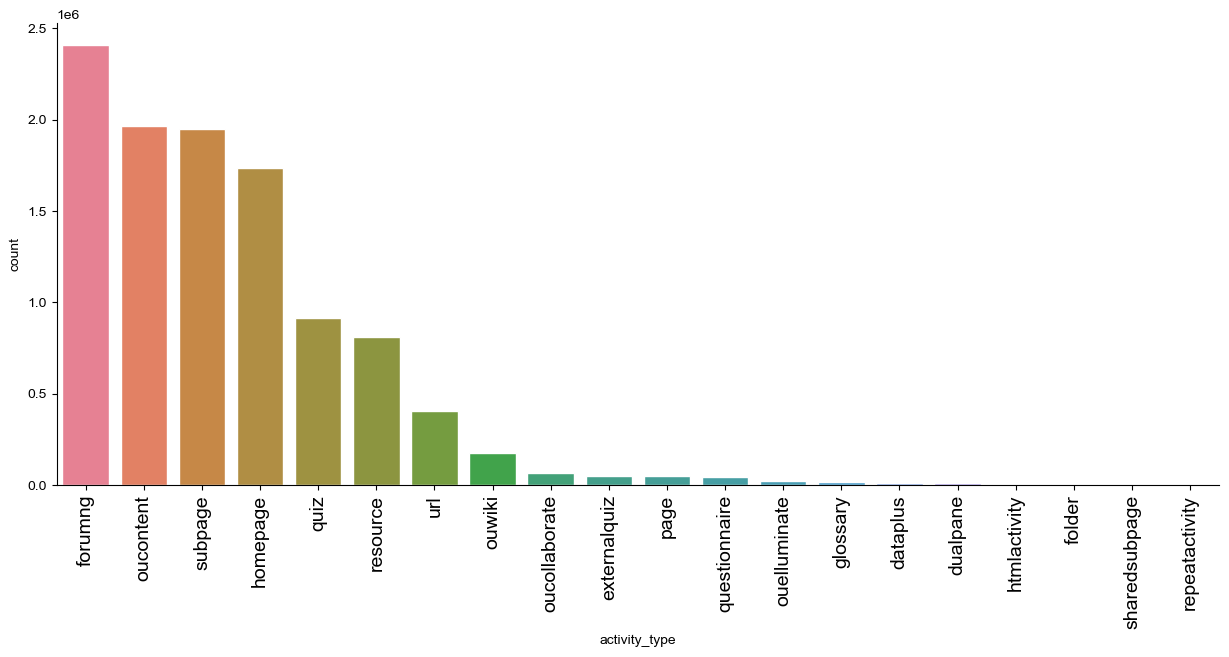

In [121]:
countplot(90, 0, 14, 10, 'activity_type', studentvle_merge_vle, plot_size=(15, 6))

#### The most accessed activity type based on mean of sum clicks

<AxesSubplot:xlabel='activity_type'>

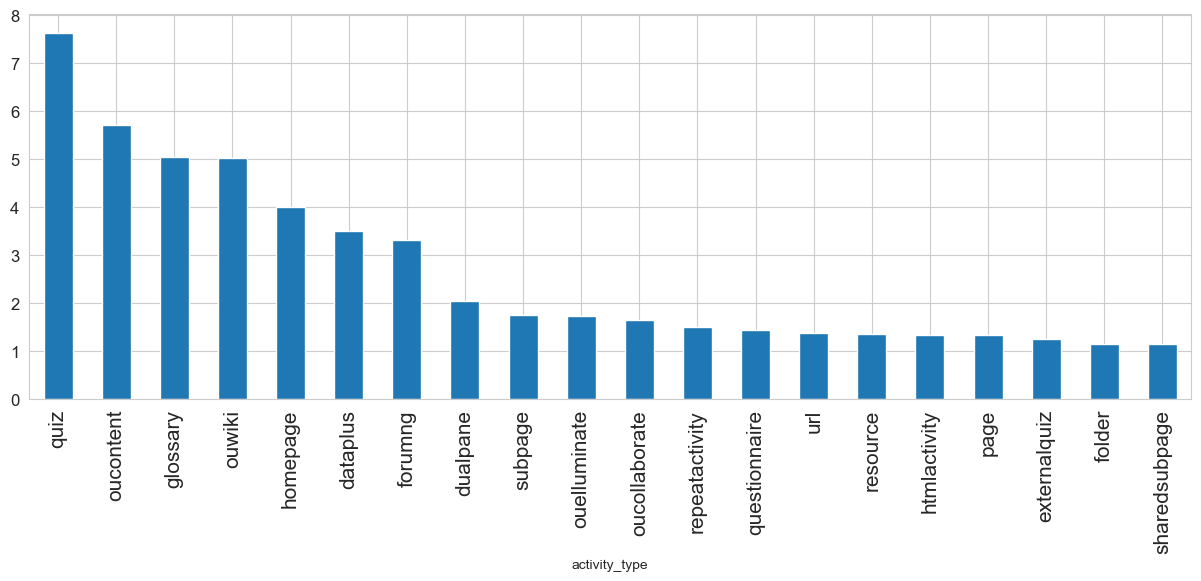

In [122]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
studentvle_merge_vle.groupby(['activity_type'], as_index=True)['sum_click'].mean().sort_values(ascending=False).plot(kind='bar')

Based on the graph above, the most accessed activities by students is quiz while the least is sharedsubpage.

#### The sum_click on VLE based on gender

<AxesSubplot:xlabel='gender'>

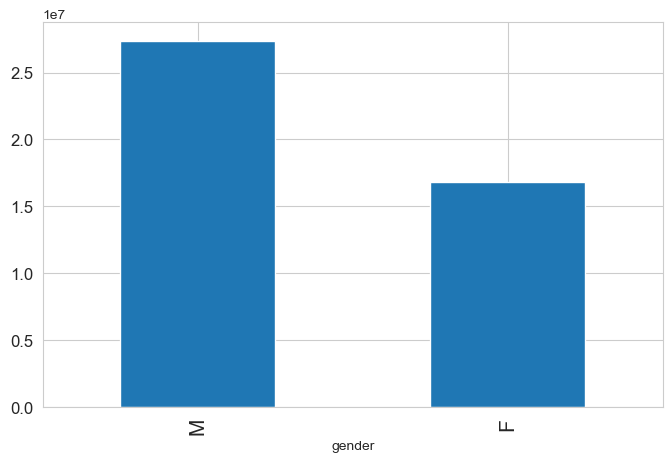

In [123]:
plt.figure(figsize = (8, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_Info.groupby(['gender'])['sum_click'].sum().sort_values(ascending = False).plot(kind='bar')

### 4.2 Overview of Students Registration

#### Counts of students based on months

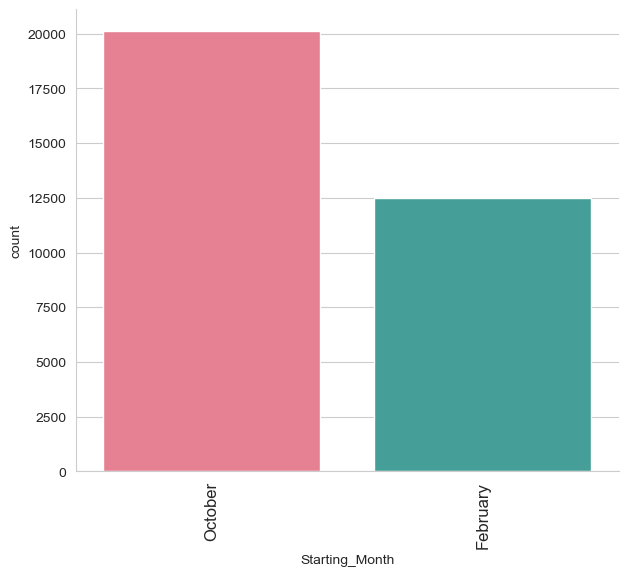

In [124]:
countplot(90, 0, 12, 10, 'Starting_Month', reg_merge_courses, plot_size=(7, 6))

#### Total of withdrawn and completed students based on starting months

1:Withdrawn<br>
0:Completed<br>
Basically, there are two starting_month to start a new semester(February and October).

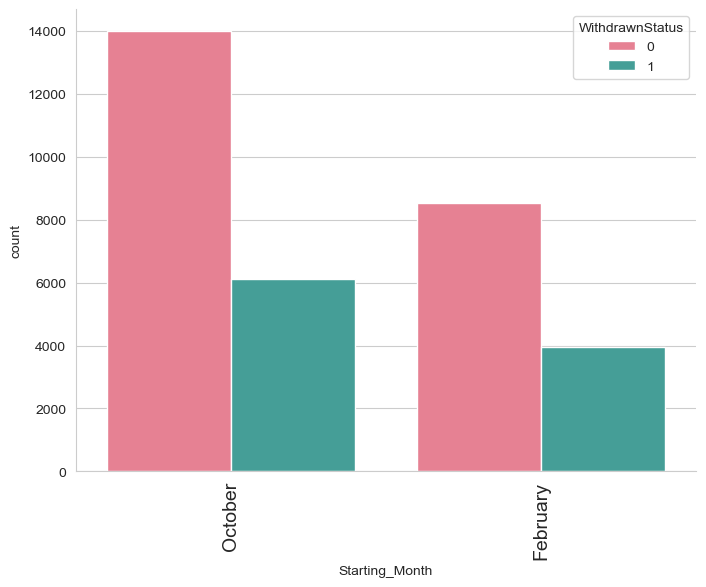

In [125]:
countplot(90, 0, 14, 10, 'Starting_Month', reg_merge_courses, plot_size=(8, 6), hue=True, hue_column_name='WithdrawnStatus')

Based on the graph above, there are more students winthdrawn in October compared to February.

#### Total of withdrawn and completed students based on years

1:Withdrawn<br>
0:Completed

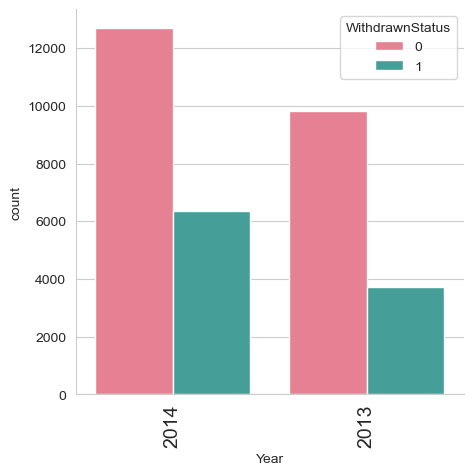

In [126]:
countplot(90, 0, 14, 10, 'Year', reg_merge_courses, plot_size=(5, 5), hue=True, hue_column_name='WithdrawnStatus')

Based on the graph above, there are more students withdrawn in 2014 compared to 2013.

#### Total of withdrawn and completed students based on code_presentation (semester)

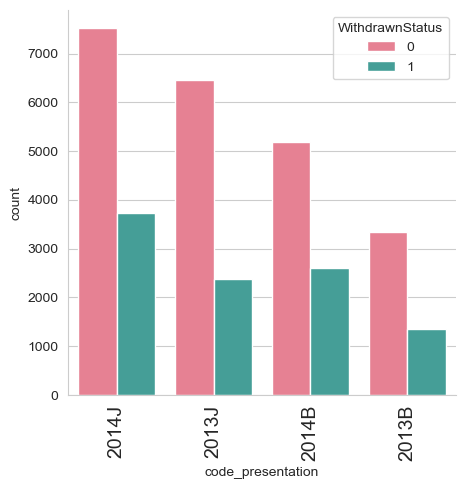

In [127]:
countplot(90, 0, 14, 10, 'code_presentation', reg_merge_courses, plot_size=(5, 5), hue=True, hue_column_name='WithdrawnStatus')

Based on the graph above, the number of withdrawn students in semester 2014J (semester of October 2014).

### 4.3 Distribution of Assessment

#### Rate of late submission based on assessment type

1:late submit<br>
0:submit on time

Late_submission          0          1
assessment_type                      
CMA              53.222170  46.777830
Exam             99.858843   0.141157
TMA              83.526203  16.473797


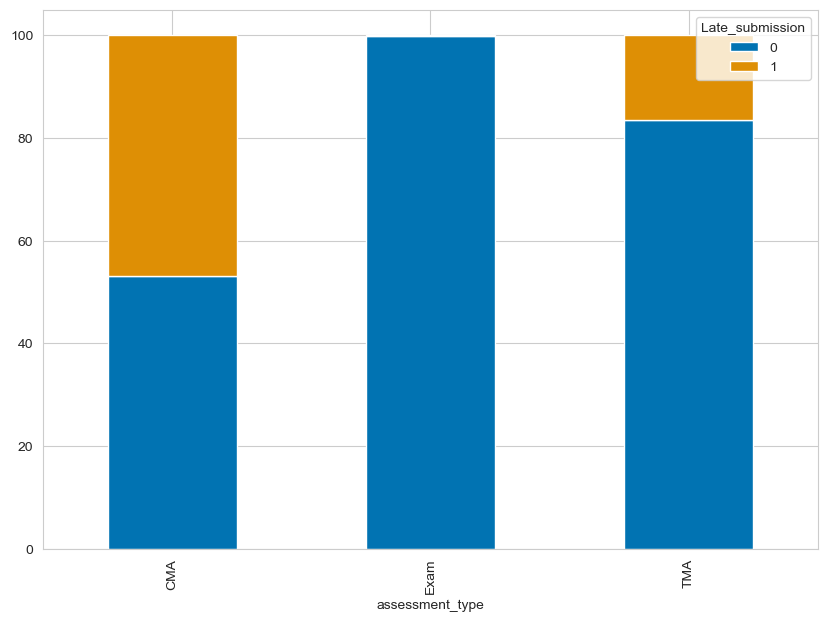

In [128]:
stacked_plot(results_merge_ass, 'assessment_type', 'Late_submission', 'id_student', plot_size=(10, 7))

Based on the graph above, most of the students are late to submit CMA assessment while the least is exam.

#### Rate of late submission based on code_module (course)

1:late submit<br>
0:submit on time

Late_submission          0          1
code_module                          
AAA              74.189447  25.810553
BBB              52.527979  47.472021
CCC              41.053410  58.946590
DDD              72.516632  27.483368
EEE              85.455237  14.544763
FFF              89.654732  10.345268
GGG              89.950707  10.049293


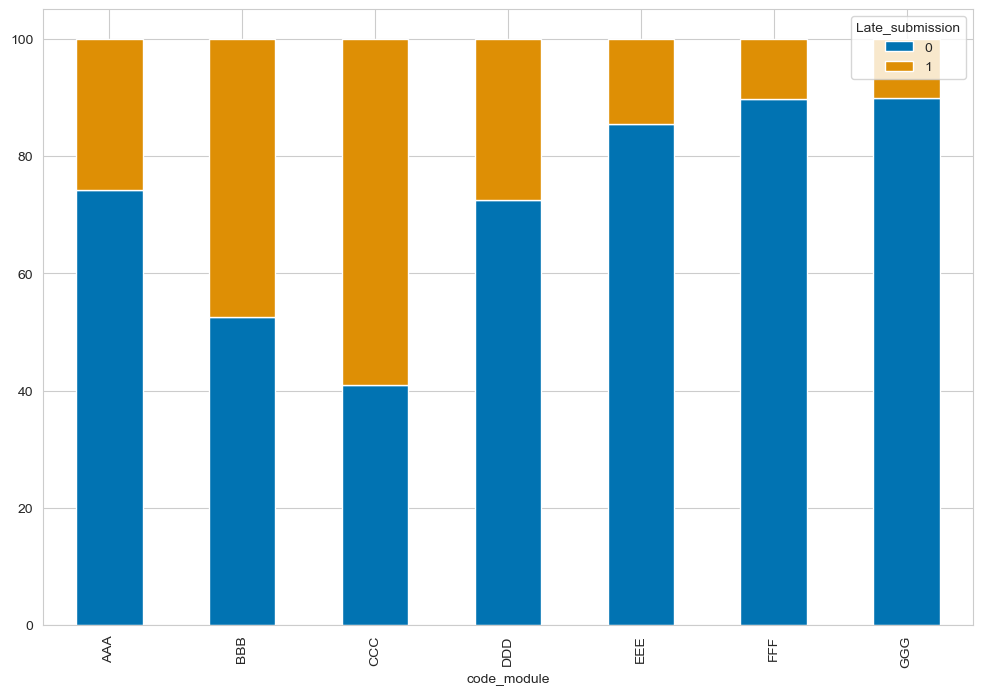

In [129]:
stacked_plot(results_merge_ass, 'code_module', 'Late_submission', 'id_student', plot_size=(12, 8))

Most of the students submitted their assessment late for code_module CCC.

#### Results of students based on code_module

Result           Fail       Pass
code_module                     
AAA          2.860776  97.139224
BBB          3.306266  96.693734
CCC          9.297903  90.702097
DDD          9.044297  90.955703
EEE          1.775298  98.224702
FFF          1.975570  98.024430
GGG          1.958593  98.041407


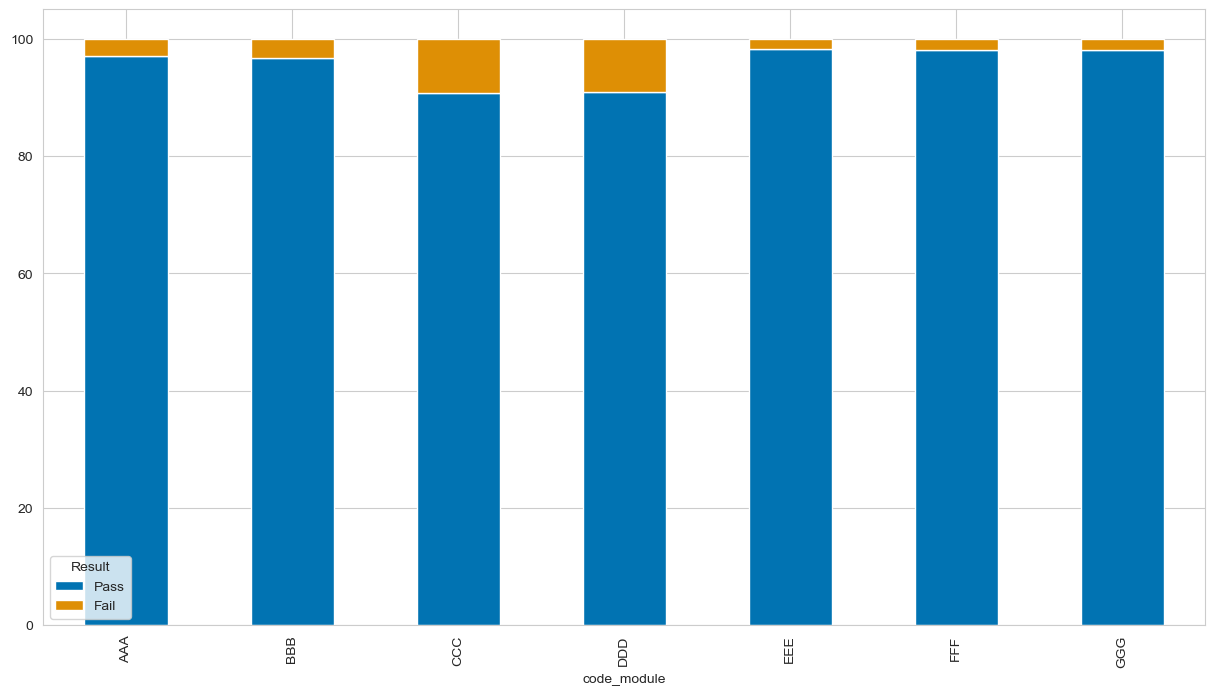

In [130]:
stacked_plot(results_merge_ass, 'code_module', 'Result', 'id_student', plot_size=(15, 8))

Based on the graph above, the fail rate of students in module CCC and DDD is almost the same and both of the modules recorded the highest fail rate. While code_module EEE,FFF and GGG recorded the highest pass rate.

#### Pass rate over year

Result      Fail       Pass
Year                       
2013    3.591194  96.408806
2014    5.062595  94.937405


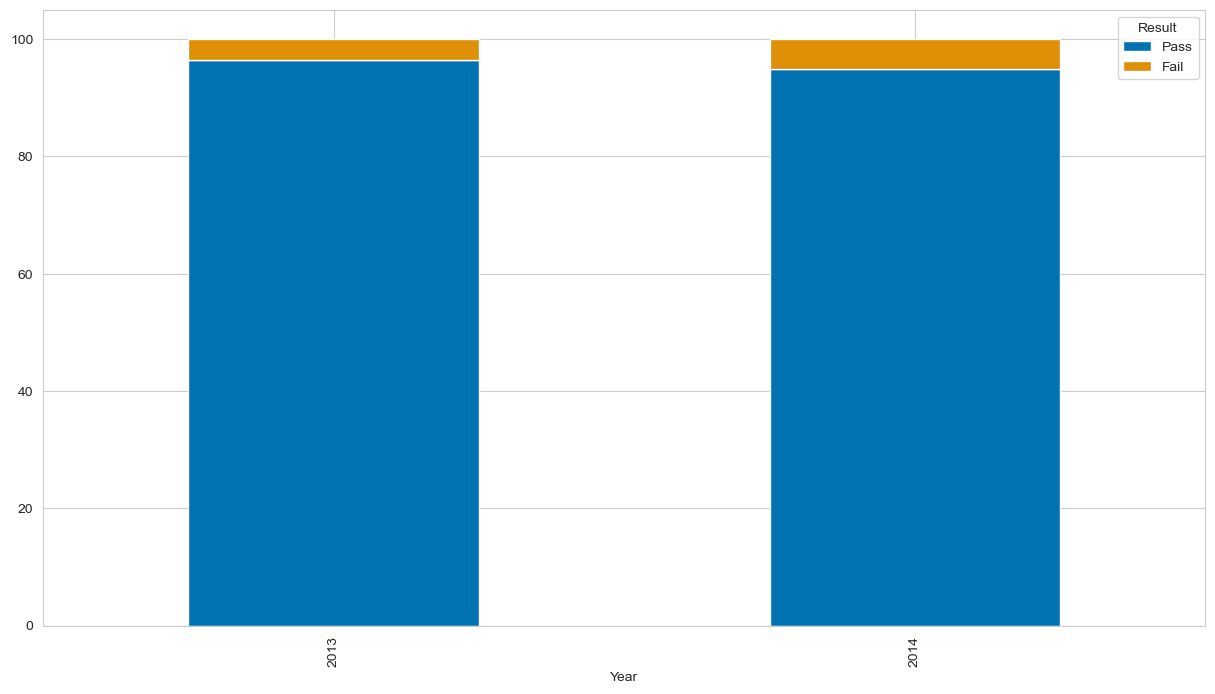

In [131]:
stacked_plot(results_merge_ass, 'Year', 'Result', 'id_student', plot_size=(15, 8))

Based on the graph above, the pass rate in both years are almost same.

#### Pass rate over semester

Result                 Fail       Pass
code_presentation                     
2013B              4.352203  95.647797
2013J              3.066433  96.933567
2014B              4.584417  95.415583
2014J              5.418937  94.581063


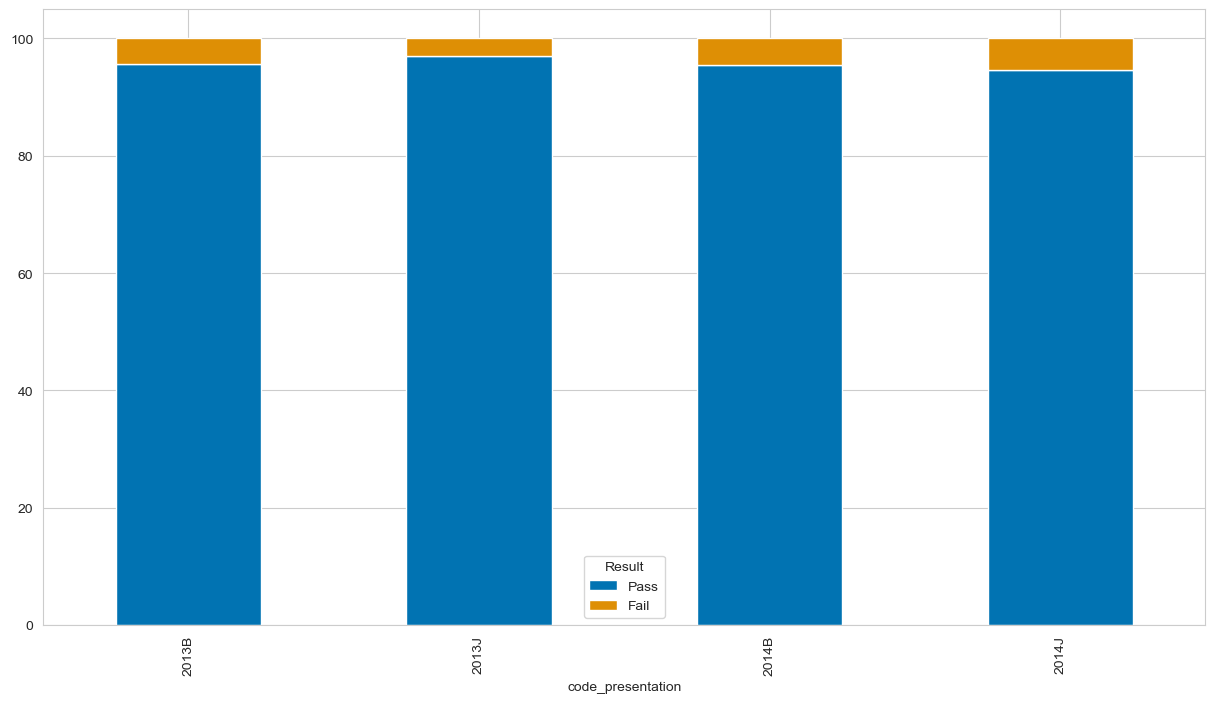

In [132]:
stacked_plot(results_merge_ass, 'code_presentation', 'Result', 'id_student', plot_size=(15, 8))

Based on the graph aboev, 2014J(October 2014) recorded the lowest pass rate.

#### Average of marks over year

In [133]:
#calculate mean of score over year
sumScore=results_merge_ass.groupby('Year', as_index=False)['score'].mean()
sumScore

,Year,score
0,2013,76.376954
1,2014,75.274376


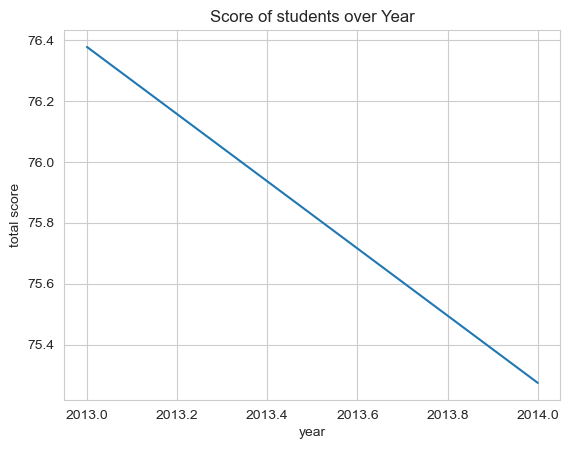

In [134]:
x_axis = sumScore['Year']
y_axis = sumScore['score']

plt.plot(x_axis, y_axis)
plt.title('Score of students over Year')
plt.xlabel('year')
plt.ylabel('total score')
plt.show()

#### Average of marks over semester

In [135]:
#calculate mean of score over code_presentation(semester)
sumScore=results_merge_ass.groupby('code_presentation', as_index=False)['score'].mean()
sumScore

,code_presentation,score
0,2013B,75.810931
1,2013J,76.767261
2,2014B,75.802904
3,2014J,74.880515


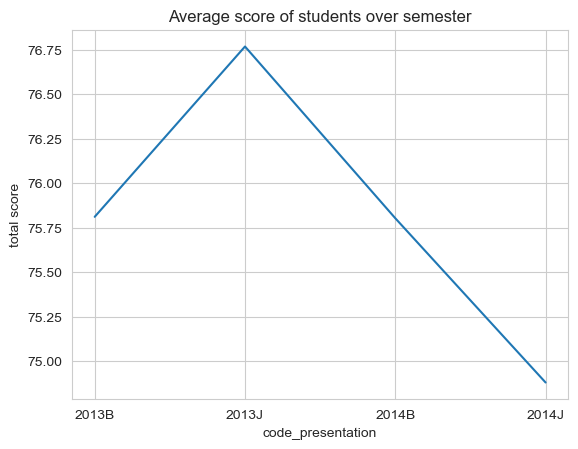

In [136]:
x_axis = sumScore['code_presentation']
y_axis = sumScore['score']

plt.plot(x_axis, y_axis)
plt.title('Average score of students over semester')
plt.xlabel('code_presentation')
plt.ylabel('total score')
plt.show()

#### Average score based on code_module

In [137]:
#calculate mean of score over code_module
meanScore=results_merge_ass.groupby('code_module', as_index=False)['score'].mean()
meanScore

meanScore_sorted= meanScore.sort_values('score',ascending=False)

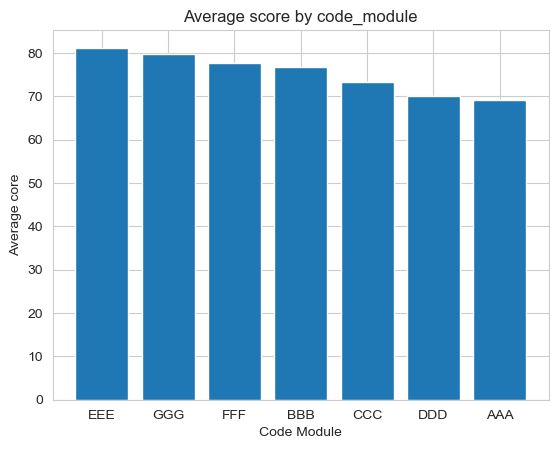

In [138]:
plt.bar(meanScore_sorted['code_module'], meanScore_sorted['score'],data=meanScore_sorted)
plt.xlabel("Code Module")
plt.ylabel("Average core") 
plt.title("Average score by code_module")
plt.show() 

Based on the graph above, module EEE has the highest average score while AAA has the lowest average score.

### 4.4 Overview of Students Distribution

#### Distribution of gender

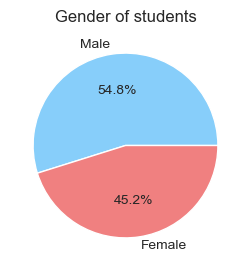

In [139]:
colors = ['lightskyblue', 'lightcoral']
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
plt.pie(student_Info['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%', colors=colors)
ax.set_title('Gender of students')
plt.show()

#### Counts of students based on region

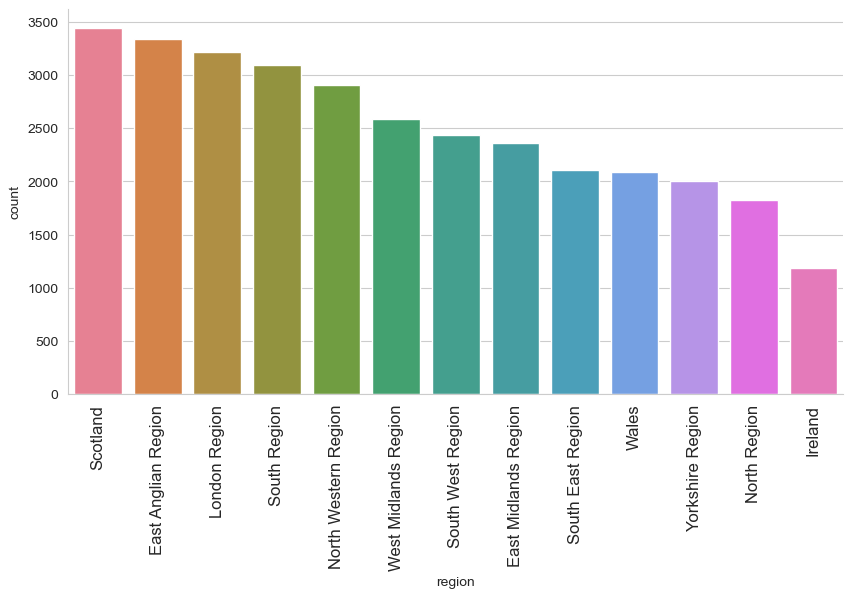

In [140]:
countplot(90, 0, 12, 10, 'region', student_Info)

#### Counts of students based on imd_band

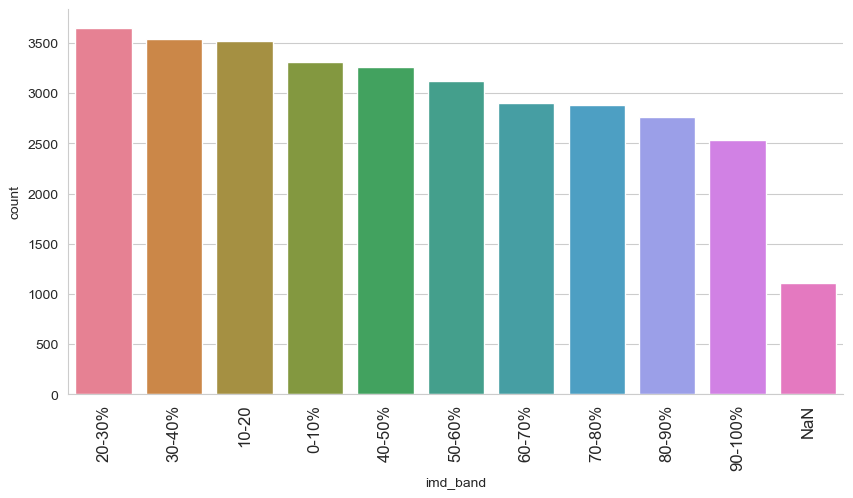

In [141]:
countplot(90, 0, 12, 10, 'imd_band', student_Info)

#### Counts of students based on disability

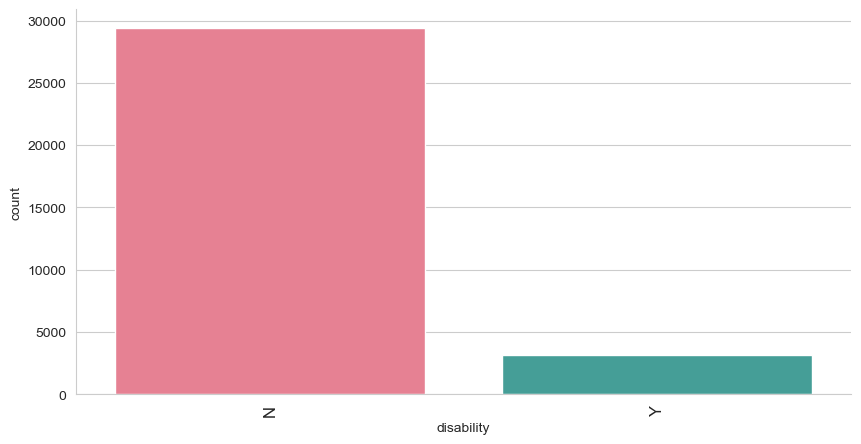

In [142]:
countplot(90, 0, 12, 10, 'disability', student_Info)

#### Counts of students based on highest_education

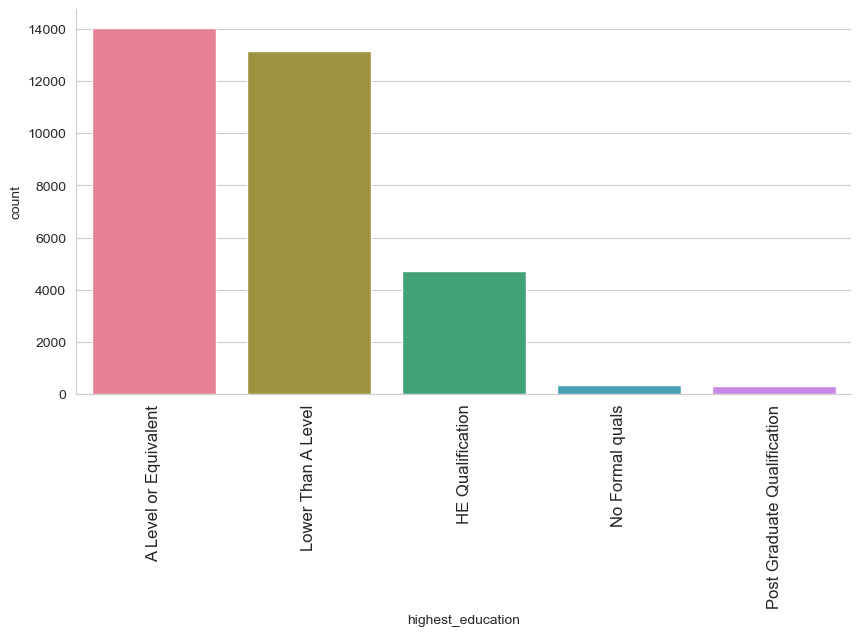

In [143]:
countplot(90, 0, 12, 10, 'highest_education', student_Info)

#### Counts of students based on num_of_prev_attempts

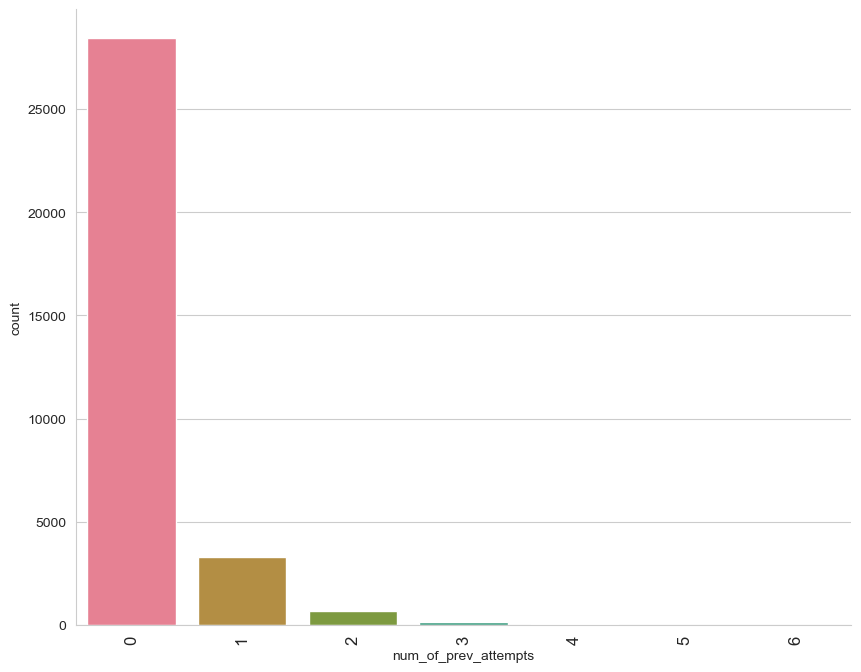

In [144]:
countplot(90, 0, 12, 10, 'num_of_prev_attempts', student_Info, plot_size=(10, 8))

#### Distribution of overall final_results

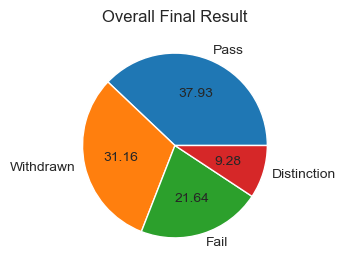

In [145]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
plt.pie(student_Info['final_result'].value_counts(),labels=['Pass','Withdrawn','Fail','Distinction'],autopct='%0.2f')
ax.set_title('Overall Final Result')
plt.show()

## Diagnostic Analytics

#### Assumption 1: Does module_presentation_length affects withdrawn status?

In [146]:
mean_module_presentation_length=reg_merge_courses.groupby('WithdrawnStatus', as_index=False)['module_presentation_length'].mean()
mean_module_presentation_length

,WithdrawnStatus,module_presentation_length
0,0,256.095378
1,1,255.819500


[Text(0, 0, '256.095'), Text(0, 0, '255.819')]

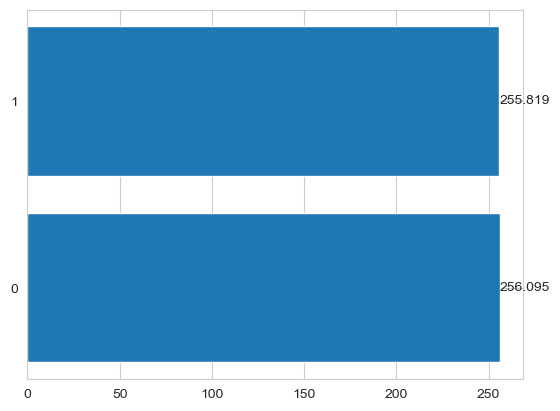

In [147]:
fig, ax = plt.subplots()
bars = ax.barh(mean_module_presentation_length['WithdrawnStatus'], mean_module_presentation_length['module_presentation_length'])

ax.bar_label(bars)

Based on the results above, the module_presentation_length doesn't affect much on withdrawn status.

#### Assumption 2: Does late submission affects results?

Result               Fail       Pass
Late_submission                     
0                3.498053  96.501947
1                6.548878  93.451122


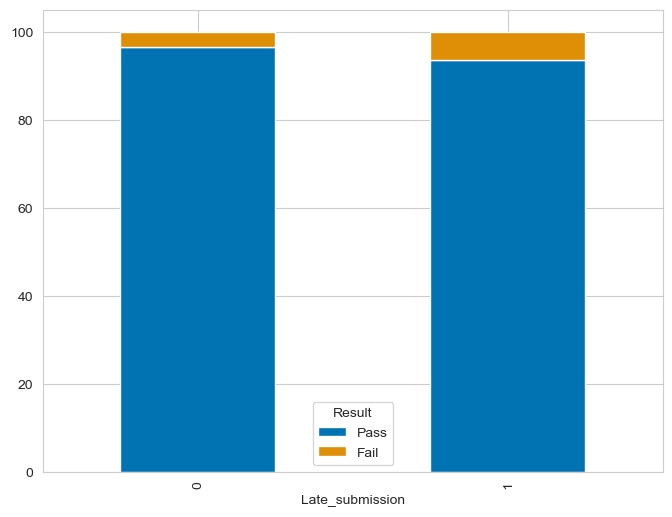

In [148]:
stacked_plot(results_merge_ass, 'Late_submission', 'Result', 'id_student', plot_size=(8, 6))

Based on the graph above, the students who are late to submit the assessment recorded a higher fail rate compared to those submit on time. So, we can conclude that the late_submission affects the result.

#### Assumption 3: Does vle behaviour of students affect results?

<AxesSubplot:xlabel='final_result'>

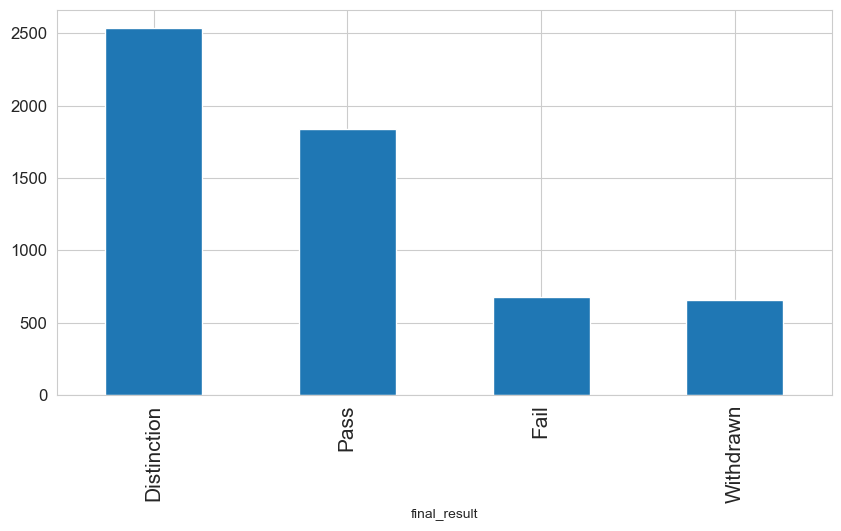

In [149]:
#number of after clicks vs final_result
#after_clicks means the course has been started

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_Info.groupby(['final_result'])['After_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:xlabel='final_result'>

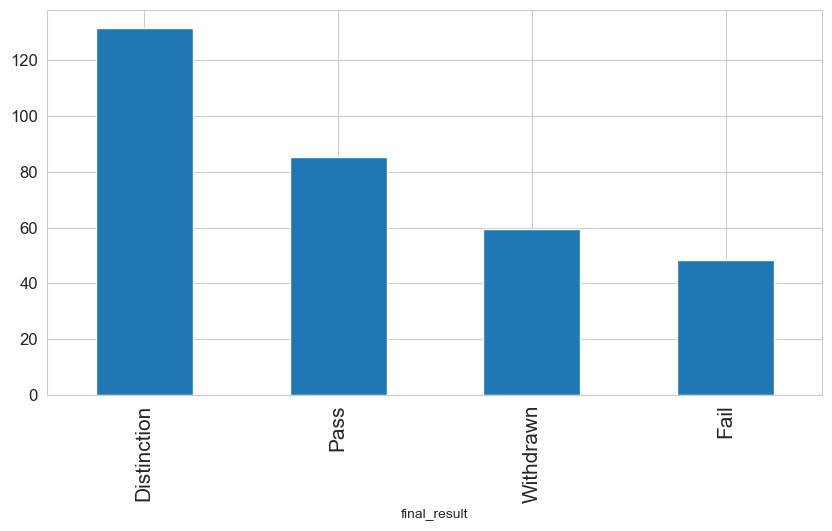

In [150]:
#number of before clicks vs final_result
#after_clicks means the course haven't started

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_Info.groupby(['final_result'])['Before_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

Based on the graphs above, the vle behaviour highly impacts on the results. The higher the sum_of_clicks, the higher chance to get distinction.

#### Assumption 4: Does studied_credits affect results?

<AxesSubplot:xlabel='final_result'>

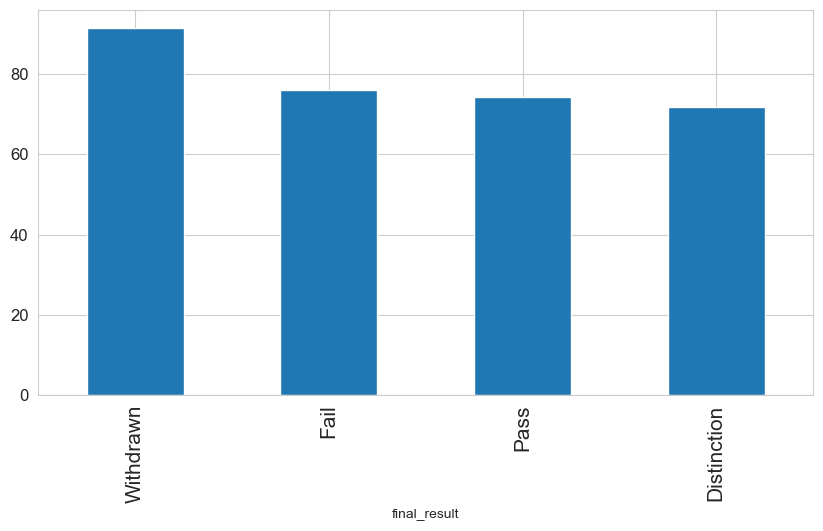

In [151]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
studentInfo.groupby(['final_result'])['studied_credits'].mean().sort_values(ascending = False).plot(kind='bar')

Based on results above, the studied_credits is one of the reasons that affect the results of students. The more the studied_credits taken by students on that semester, the higher the chances of students withdrawn and fail.

#### Assumption 5: Does age_band affects results?

final_result  Distinction       Fail       Pass  Withdrawn
age_band                                                  
0-35             8.119770  22.798989  36.911611  32.169630
35-55           11.873211  18.997138  40.284109  28.845542
55<=            18.981481  13.425926  42.592593  25.000000


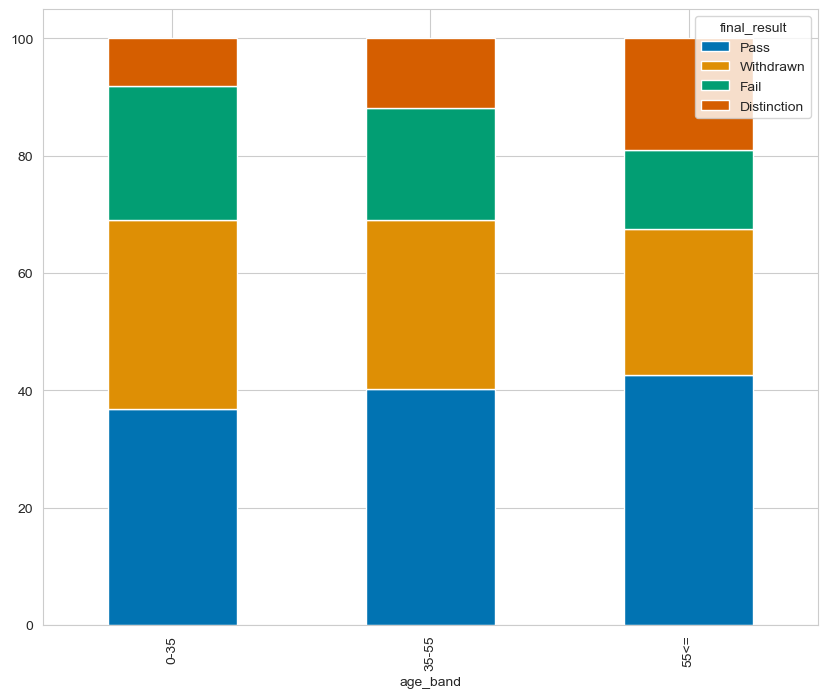

In [152]:
stacked_plot(studentInfo, 'age_band', 'final_result', 'id_student', plot_size=(10, 8))

Based on the graph above, the age_band doesn't impact on the results.

#### Assumption 6: Does highest_education affects results?

final_result                 Distinction       Fail       Pass  Withdrawn
highest_education                                                        
A Level or Equivalent          10.651477  19.273763  41.381274  28.693485
HE Qualification               14.735729  16.701903  41.437632  27.124736
Lower Than A Level              5.525156  26.037392  33.325733  35.111719
No Formal quals                 4.610951  27.377522  25.072046  42.939481
Post Graduate Qualification    28.115016  10.862620  37.380192  23.642173


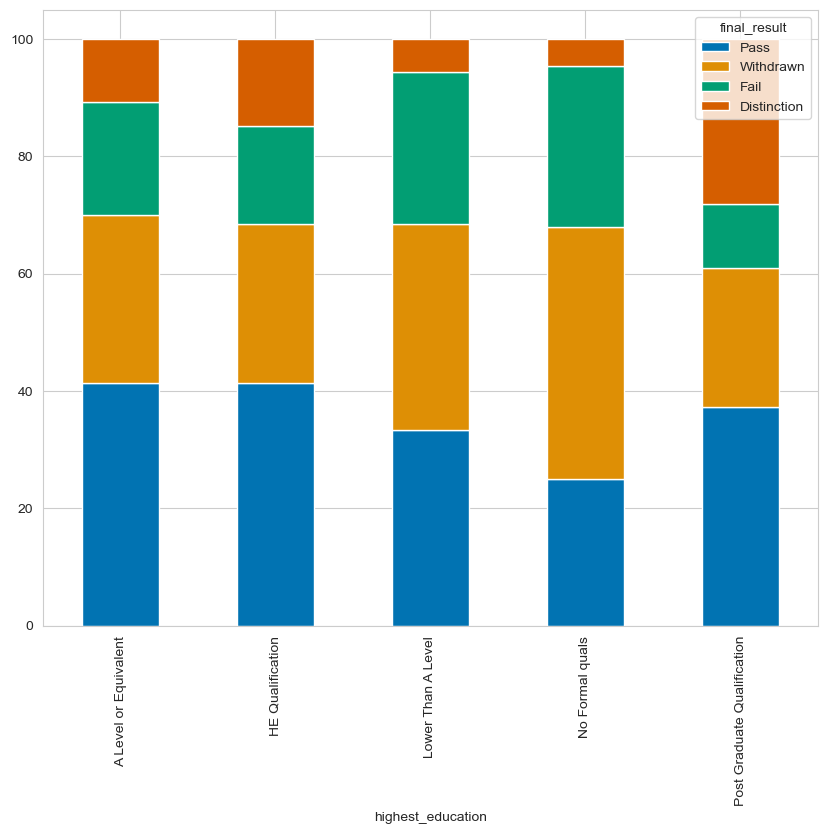

In [153]:
stacked_plot(studentInfo, 'highest_education', 'final_result', 'id_student', plot_size=(10, 8))

Based on the result above, the highest education level highly affects the results. The students who poses the higher education level (HE Qualification, A-level or Equivalent and Post Graduate Qualification) received a good results compared to those lower than A level and no formal qualification.

#### Assumption 7: Does gender affects results?

final_result  Distinction       Fail       Pass  Withdrawn
gender                                                    
F                9.471396  21.083028  38.965892  30.479685
M                9.118881  22.092308  37.068531  31.720280


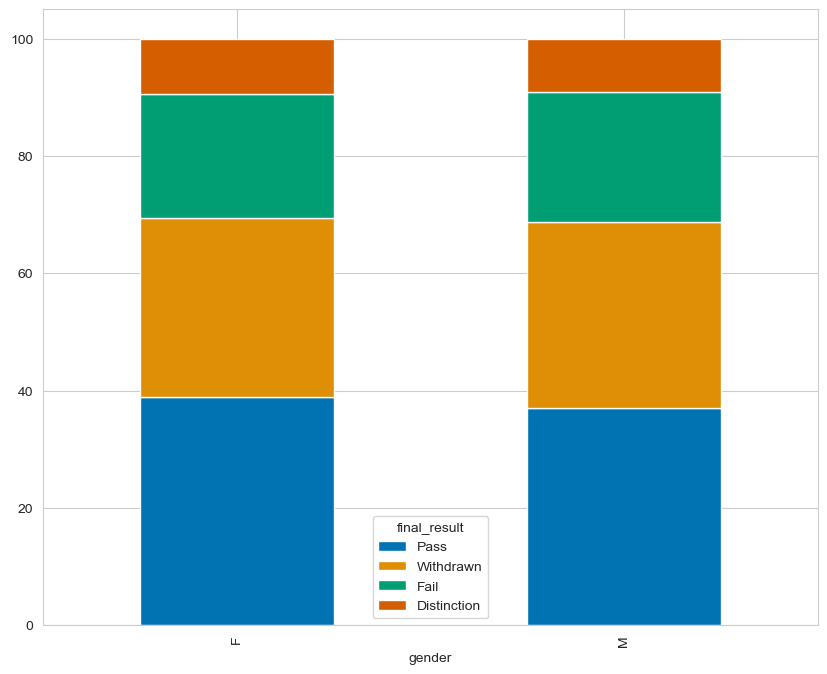

In [154]:
stacked_plot(studentInfo, 'gender', 'final_result', 'id_student', plot_size=(10, 8))

Gender is not correlated to the results.

#### Assumption 8: Does number of previous attempts affects results?

final_result          Distinction       Fail       Pass  Withdrawn
num_of_prev_attempts                                              
0                       10.052426  20.164667  39.224517  30.558390
1                        4.334647  30.585026  30.221279  34.859048
2                        3.259259  34.962963  25.185185  36.592593
3                        0.704225  40.140845  21.830986  37.323944
4                        0.000000  30.769231  33.333333  35.897436
5                        0.000000  46.153846  15.384615  38.461538
6                       25.000000  25.000000   0.000000  50.000000


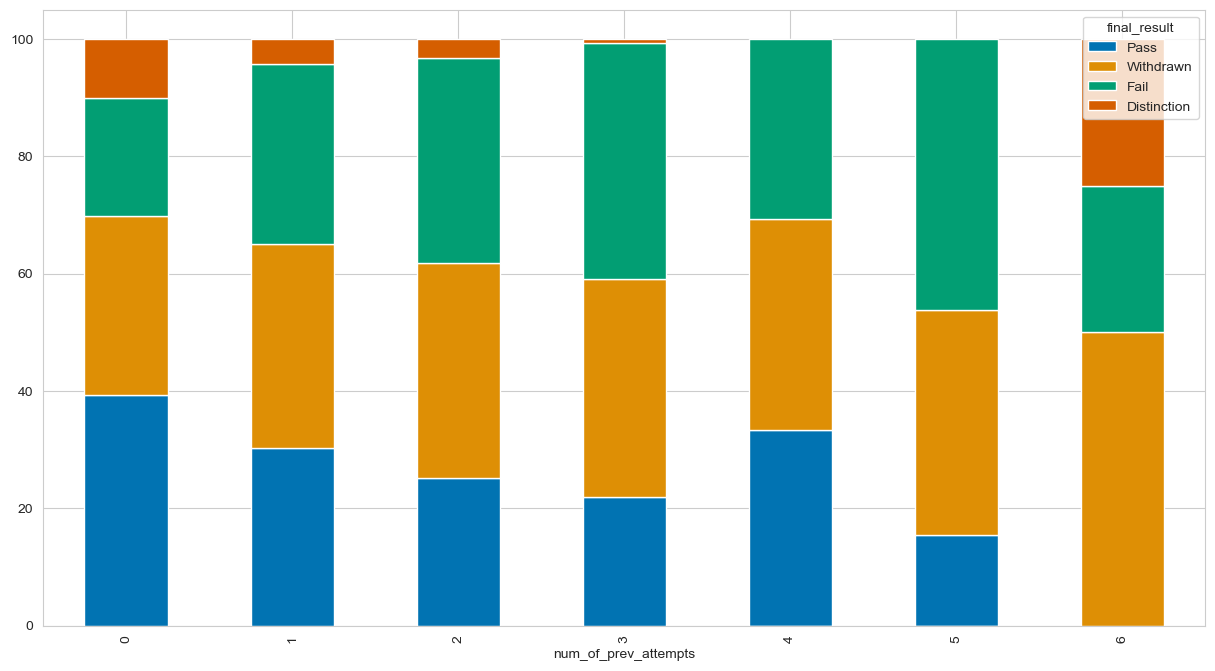

In [155]:
stacked_plot(studentInfo, 'num_of_prev_attempts', 'final_result', 'id_student', plot_size=(15, 8))

Based on the graph above, num_of_prev_attempts does not impact on results.

# Part 5:Feature Selection

In [156]:
student_Info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,After_Clicks,Before_Clicks,date_registration,WithdrawnStatus,module_presentation_length,Year,Starting_Month
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,836.0,98.0,159.0,0,268,2013,October
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,1220.0,215.0,53.0,0,268,2013,October
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,179.0,102.0,92.0,1,268,2013,October
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,1989.0,169.0,52.0,0,268,2013,October
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,739.0,295.0,176.0,0,268,2013,October


#### Copy data from student_Info and assigned as data 

In [157]:
data=student_Info.copy()

In [158]:
data = data.drop(['Year', 'WithdrawnStatus'], axis = 1)

In [159]:
data['date_registration'] = data['date_registration'].astype(float)

In [160]:
data['id_student'] = data['id_student'].astype(int)

#### Categorize dropout column

In [161]:
data['dropout'] = [0 if final_result in ['Pass', 'Distinction','Fail'] else 1 for final_result in data['final_result']]

#### Categorize final result

1: Pass, Distinction<br>
0: Fail, Withdrawn

In [162]:
data['final_result'] = [0 if final_result in ['Withdrawn', 'Fail'] else 1 for final_result in data['final_result']]

#### Assign attributes to nominal and ordinal columns

In [163]:
nominal_columns = ['highest_education','gender', 'region', 'disability', 'Starting_Month', 'code_module', 'code_presentation']
ordinal_columns = ['imd_band', 'age_band']

In [164]:
from sklearn.preprocessing import LabelEncoder

def labelEncoder(data, columns_list):
    for col in columns_list:
        encoder = LabelEncoder()
        data[col]  = encoder.fit_transform(data[col])
    return data

def categorical_encoding(df, column_name_list=[]):
    
    for column_name in column_name_list:
        print(df[column_name].unique())
        categorical_columns = pd.get_dummies(df[column_name], prefix = column_name, 
                                             prefix_sep = '_', drop_first = False)
        df = pd.concat([df, categorical_columns], axis = 1)
        df = df.drop(column_name, axis = 1)
    return df

data = labelEncoder(data, ordinal_columns)
data = categorical_encoding(data, nominal_columns)

['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']
['M' 'F']
['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']
['N' 'Y']
['October' 'February']
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
['2013J' '2014J' '2013B' '2014B']


### Feature Selection - [Final Result]

In [165]:
data1=data.copy()
data_result=data1.drop('id_student', axis = 1)

#### Recursive Feature Elimination Cross Validation (RFECV)

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import time

X, y = data_result.drop(['final_result'], axis=1), data_result['final_result']

# Set a fixed random seed value
random_seed = 42

# Initialize a random forest classifier with 100 estimators and the fixed random seed value
rfc = RandomForestClassifier(n_estimators=100, random_state=random_seed)

# Initialize a recursive feature elimination object with the same fixed random seed value
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')

start_time = time.time()  # Record the start time

# Fit the RFE object on the data to perform feature selection
rfecv.fit(X, y)

end_time = time.time()  # Record the end time
processing_time = end_time - start_time  # Calculate the processing time

# Print the number of selected features and the processing time
print("Optimal number of features: %d" % rfecv.n_features_)
print("Processing time: %f seconds" % processing_time)

Optimal number of features: 16
Processing time: 1068.683338 seconds


In [167]:
# Print the indices of the selected features
print("Selected features indices: ", end='')
for i in range(len(rfecv.support_)):
    if rfecv.support_[i]:
        print(i, end=' ')

Selected features indices: 0 1 2 3 4 5 6 7 8 9 10 12 16 35 39 40 

In [168]:
# Get the indices of the selected features
selected_indices = rfecv.get_support(indices=True)

# Get the names of the selected features
selected_names = list(data_result.columns[selected_indices])

# Print the indices and names of the selected features
print("Selected features indices and names: ")
for i, name in zip(selected_indices, selected_names):
    print(i, name)

Selected features indices and names: 
0 imd_band
1 age_band
2 num_of_prev_attempts
3 studied_credits
4 final_result
5 sum_click
6 After_Clicks
7 Before_Clicks
8 date_registration
9 module_presentation_length
10 dropout
12 highest_education_HE Qualification
16 gender_F
35 code_module_AAA
39 code_module_EEE
40 code_module_FFF


In [169]:
#Select the desired columns 
selected_columns=['id_student','imd_band','age_band','num_of_prev_attempts', 'studied_credits', 'final_result', 'sum_click', 'After_Clicks', 'Before_Clicks', 'date_registration', 'module_presentation_length','dropout','highest_education_HE Qualification','gender_F','code_module_AAA', 'code_module_EEE', 'code_module_FFF']

In [170]:
data_result = data1[selected_columns]

In [171]:
# create a label encoder object
le = LabelEncoder()

# fit and transform the id_student feature
data_result['id_student'] = le.fit_transform(data_result['id_student'])

### Feature Selection - [dropout] 

In [172]:
data2=data.copy()
data_dropout=data2.drop('id_student', axis = 1)

#### Recursive Feature Elimination Cross Validation (RFECV)

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import time

X, y = data_dropout.drop(['dropout'], axis=1), data_dropout['dropout']

# Set a fixed random seed value
random_seed = 42

# Initialize a random forest classifier with 100 estimators and the fixed random seed value
rfc = RandomForestClassifier(n_estimators=100, random_state=random_seed)

# Initialize a recursive feature elimination object with the same fixed random seed value
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(3), scoring='accuracy')

start_time = time.time()  # Record the start time

# Fit the RFE object on the data to perform feature selection
rfecv.fit(X, y)

end_time = time.time()  # Record the end time
processing_time = end_time - start_time  # Calculate the processing time

# Print the number of selected features and the processing time
print("Optimal number of features: %d" % rfecv.n_features_)
print("Processing time: %f seconds" % processing_time)

Optimal number of features: 8
Processing time: 503.587063 seconds


In [174]:
# Print the indices of the selected features
print("Selected features indices: ", end='')
for i in range(len(rfecv.support_)):
    if rfecv.support_[i]:
        print(i, end=' ')

Selected features indices: 0 3 4 5 6 7 8 9 

In [175]:
# Get the indices of the selected features
selected_indices = rfecv.get_support(indices=True)

# Get the names of the selected features
selected_names = list(data_dropout.columns[selected_indices])

# Print the indices and names of the selected features
print("Selected features indices and names: ")
for i, name in zip(selected_indices, selected_names):
    print(i, name)

Selected features indices and names: 
0 imd_band
3 studied_credits
4 final_result
5 sum_click
6 After_Clicks
7 Before_Clicks
8 date_registration
9 module_presentation_length


In [176]:
#Select the desired columns 
selected_columns_dropout = ['id_student','imd_band','studied_credits','final_result', 'sum_click', 'After_Clicks', 'Before_Clicks', 'date_registration','module_presentation_length','dropout']

In [177]:
data_dropout = data2[selected_columns_dropout]

In [178]:
# fit and transform the id_student feature
data_dropout['id_student'] = le.fit_transform(data_dropout['id_student'])

# Part 6: Model Training - Prediction using Machine Learning

## Part 1: Predict final result of students 

In this part, the 60% of the data will be trained to predict 40%  of the students final result.

#### Set target and features

In [179]:
target  = data_result['final_result']
feature = data_result.drop(['final_result'], axis=1)

#### Assign to train and test

In [180]:
train = pd.DataFrame(feature)
test = pd.DataFrame(target)

#### Split dataset into train, validate and test data

In [181]:
####60% training 20% test and 20% validation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, test,
    test_size=0.2, shuffle = True, random_state = 42)

#validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
   test_size=0.25, random_state= 42) #0.25*0.8=0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (19555, 16)
X_test shape: (6519, 16)
y_train shape: (19555, 1)
y_test shape: (6519, 1)
X_val shape: (19555, 1)
y val shape: (6519, 1)


#### Import Libraries

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
import time

### Model 1: Random Forest

#### Build RF model 

In [183]:
random_forest_model = RandomForestClassifier(n_estimators=140, random_state=42)

RFstart_time = time.time()

random_forest_model.fit(X_train, y_train)

RFend_time = time.time()

RFelapsed_time = RFend_time - RFstart_time

#### Make Predictions

In [184]:
RFpredictions = random_forest_model.predict(X_test)
RFpredictions

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

#### Model Evaluation

In [185]:
#Accuracy
print('\033[1mAccuracy\033[0m')
print("The test accuracy of Random Forest model is ", ((accuracy_score(y_test, RFpredictions)*100)),"%.")
print("The validation accuracy of Random Forest model is ",((random_forest_model.score(X_val, y_val)*100)),"%.\n")

#Precision
print('\033[1mPrecision\033[0m')
print("The precision of Random Forest model is ",((metrics.precision_score(y_test, RFpredictions)*100)),"%.\n")

# Recall
print('\033[1mRecall\033[0m')
print("The precision of Random Forest model is ",((metrics.recall_score(y_test, RFpredictions)*100)),"%.\n")

print('\033[1mTime taken for training\033[0m')
print("Time taken for RF model training is ",RFelapsed_time,"seconds.")

Accuracy
The test accuracy of Random Forest model is  87.8048780487805 %.
The validation accuracy of Random Forest model is  88.0503144654088 %.

Precision
The precision of Random Forest model is  82.60115606936415 %.

Recall
The precision of Random Forest model is  93.67420517862996 %.

Time taken for training
Time taken for RF model training is  3.60371994972229 seconds.


#### Confusion Matrix

In [186]:
cmRF=confusion_matrix(y_test, RFpredictions)
cmRF

array([[2866,  602],
       [ 193, 2858]], dtype=int64)

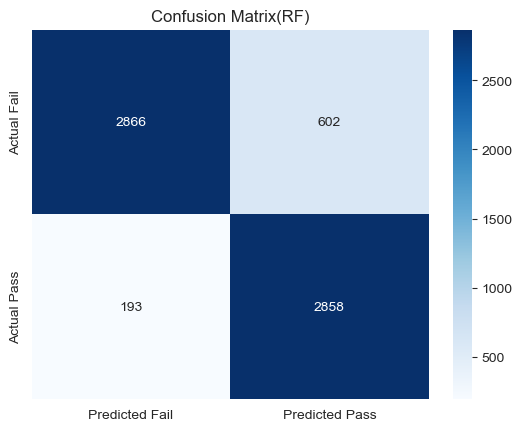

In [187]:
sns.heatmap(cmRF, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Fail', 'Predicted Pass'], yticklabels=['Actual Fail', 'Actual Pass'])

plt.title('Confusion Matrix(RF)')
plt.show()

#### Print Classification Report

In [188]:
print(classification_report(y_test, RFpredictions, digits=3))

              precision    recall  f1-score   support

           0      0.937     0.826     0.878      3468
           1      0.826     0.937     0.878      3051

    accuracy                          0.878      6519
   macro avg      0.881     0.882     0.878      6519
weighted avg      0.885     0.878     0.878      6519



#### Convert to list

In [189]:
RFlist = RFpredictions.tolist()

In [190]:
RF_test_results = X_test.copy()

In [191]:
RF_test_results['RF_actual'] = y_test['final_result'].apply(lambda x: 'Fail' if x == 0 else 'Pass')
RF_test_results['RF_predicted'] = RFlist
RF_test_results['RF_predicted'] = RF_test_results['RF_predicted'].apply(lambda x: 'Fail' if x == 0 else 'Pass')
RF_test_results['id_student'] = le.inverse_transform(X_test['id_student'])

In [192]:
RF_results = pd.DataFrame(RF_test_results[['id_student', 'RF_actual', 'RF_predicted']])

print(RF_results)

       id_student RF_actual RF_predicted
21105     2632165      Pass         Pass
30047     2678580      Fail         Fail
7302       642122      Pass         Pass
12840     1101190      Pass         Pass
29147      656579      Pass         Pass
...           ...       ...          ...
22898      505002      Fail         Fail
23582      556133      Pass         Pass
28963      650923      Pass         Pass
4252       602598      Fail         Fail
21428      605541      Fail         Fail

[6519 rows x 3 columns]


In [193]:
match_count = (RF_results['RF_actual'] == RF_results['RF_predicted'] ).sum()

print('Number of matches:', match_count)

Number of matches: 5724


In [194]:
RF_results.to_csv('RF_predicted_result.csv')

#### Features Importance

In [195]:
importance = pd.concat([pd.DataFrame(X_train.columns),
                          pd.DataFrame(np.transpose(random_forest_model.feature_importances_))], axis = 1)
importance.columns = ['Features', 'Coefficient']
importance = importance.sort_values('Coefficient', ascending=False)
importance

,Features,Coefficient
10,dropout,0.287384
6,After_Clicks,0.215567
5,sum_click,0.181709
7,Before_Clicks,0.066625
0,id_student,0.053747
8,date_registration,0.048246
1,imd_band,0.031177
15,code_module_FFF,0.030939
9,module_presentation_length,0.023023
4,studied_credits,0.021244


In [196]:
importance.to_csv("RF_finalresults_featuresimportance.csv")

### Model 2: Artificial Neural Network

#### Build ANN Model

In [197]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the model architecture
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=16))
model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ANNstart_time = time.time()

# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

ANNend_time = time.time()

ANNelapsed_time = ANNend_time - ANNstart_time

Epoch 1/50
612/612 [==============================] - 3s 2ms/step - loss: 61.0355 - accuracy: 0.6336 - val_loss: 14.2554 - val_accuracy: 0.6187
Epoch 2/50
612/612 [==============================] - 1s 2ms/step - loss: 13.7903 - accuracy: 0.6609 - val_loss: 7.5340 - val_accuracy: 0.7078
Epoch 3/50
612/612 [==============================] - 1s 2ms/step - loss: 13.1441 - accuracy: 0.6630 - val_loss: 45.8909 - val_accuracy: 0.5038
Epoch 4/50
612/612 [==============================] - 1s 2ms/step - loss: 14.5353 - accuracy: 0.6653 - val_loss: 7.8147 - val_accuracy: 0.6823
Epoch 5/50
612/612 [==============================] - 2s 3ms/step - loss: 10.6142 - accuracy: 0.6726 - val_loss: 7.3993 - val_accuracy: 0.7174
Epoch 6/50
612/612 [==============================] - 2s 3ms/step - loss: 9.8707 - accuracy: 0.6775 - val_loss: 16.4600 - val_accuracy: 0.5961
Epoch 7/50
612/612 [==============================] - 1s 2ms/step - loss: 8.4410 - accuracy: 0.6839 - val_loss: 31.3156 - val_accuracy: 0.54

#### Make Predictions

In [198]:
ANNpredictions = model.predict(X_test)

print(ANNpredictions)

204/204 [==============================] - 1s 1ms/step
[[0.99865824]
 [0.01944312]
 [0.99699163]
 ...
 [0.96238846]
 [0.00299806]
 [0.32099015]]


#### Model Evaluation

Since binary, set threshold to 0.5 to round off.

In [199]:
threshold = 0.5
predictions_binary = (ANNpredictions > threshold).astype(int)

predictions_binary = predictions_binary.astype(int)
print(f'The threshold used for converting probabilities to binary predictions is {threshold}')

The threshold used for converting probabilities to binary predictions is 0.5


In [200]:
#Accuracy
print('\033[1mAccuracy\033[0m')
print("The test accuracy of ANN model is ", (model.evaluate(X_test, y_test)[1])*100,"%.")
print("The validation accuracy of ANN model is ",((model.evaluate(X_val, y_val)[1]*100)),"%.\n")

#Precision
print('\033[1mPrecision\033[0m')
print("The precision of ANN model is ",((metrics.precision_score(y_test, predictions_binary)*100)),"%.\n")

# Recall
print('\033[1mRecall\033[0m')
print("The precision of ANN model is ",((metrics.recall_score(y_test, predictions_binary)*100)),"%.\n")

print('\033[1mTime taken for training\033[0m')
print("Time taken for ANN model training is ",ANNelapsed_time,"seconds.")

Accuracy
204/204 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.8322
The test accuracy of ANN model is  83.21828246116638 %.
204/204 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.8429
The validation accuracy of ANN model is  84.292072057724 %.

Precision
The precision of ANN model is  75.1219512195122 %.

Recall
The precision of ANN model is  95.90298262864636 %.

Time taken for training
Time taken for ANN model training is  67.15993118286133 seconds.


#### Confusion Matrix

In [201]:
cmANN = confusion_matrix(y_test, predictions_binary)
cmANN

array([[2499,  969],
       [ 125, 2926]], dtype=int64)

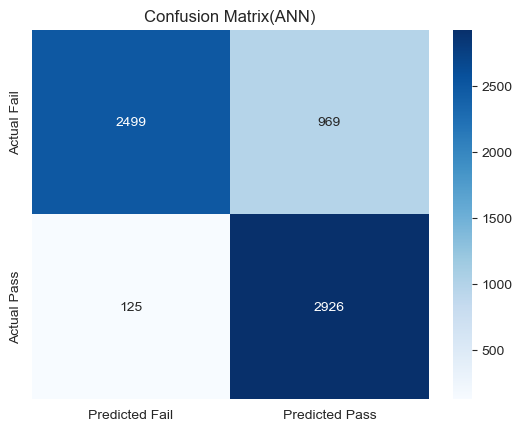

In [202]:
sns.heatmap(cmANN, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Fail', 'Predicted Pass'], yticklabels=['Actual Fail', 'Actual Pass'])

plt.title('Confusion Matrix(ANN)')
plt.show()

#### Print Classification Report

In [203]:
print(classification_report(y_test, predictions_binary, digits=3))

              precision    recall  f1-score   support

           0      0.952     0.721     0.820      3468
           1      0.751     0.959     0.842      3051

    accuracy                          0.832      6519
   macro avg      0.852     0.840     0.831      6519
weighted avg      0.858     0.832     0.831      6519



#### Convert to list

In [204]:
ANNlist = predictions_binary.tolist()
ANN_df = pd.DataFrame(ANNlist, columns=['ANN'])

print(ANN_df)

      ANN
0       1
1       0
2       1
3       1
4       1
...   ...
6514    0
6515    1
6516    1
6517    0
6518    0

[6519 rows x 1 columns]


In [205]:
ANN_df['ANN_predicted'] = ANN_df['ANN'].apply(lambda x: 'Fail' if x == 0 else 'Pass')
ANN_df

,ANN,ANN_predicted
0,1,Pass
1,0,Fail
2,1,Pass
3,1,Pass
4,1,Pass
...,...,...
6514,0,Fail
6515,1,Pass
6516,1,Pass
6517,0,Fail


In [206]:
ANN_test_results = X_test.copy()

In [207]:
ANN_test_results['ANN_actual'] = y_test['final_result'].apply(lambda x: 'Fail' if x == 0 else 'Pass')
ANN_test_results['id_student'] = le.inverse_transform(X_test['id_student'])

In [208]:
ANN_result = pd.concat([ANN_test_results[['id_student','ANN_actual']].reset_index(drop=True), ANN_df[['ANN_predicted']].reset_index(drop=True)], axis=1)
print(ANN_result)

      id_student ANN_actual ANN_predicted
0        2632165       Pass          Pass
1        2678580       Fail          Fail
2         642122       Pass          Pass
3        1101190       Pass          Pass
4         656579       Pass          Pass
...          ...        ...           ...
6514      505002       Fail          Fail
6515      556133       Pass          Pass
6516      650923       Pass          Pass
6517      602598       Fail          Fail
6518      605541       Fail          Fail

[6519 rows x 3 columns]


In [209]:
match_count = (ANN_result['ANN_actual'] == ANN_result['ANN_predicted']).sum()
print('Number of matches:', match_count)

Number of matches: 5425


In [210]:
ANN_result.to_csv('ANN_predicted_result.csv')

### Model 3: Support Vector Machine

#### Build SVM Model

In [211]:
svm_model = SVC(kernel='linear')

SVM_start_time = time.time()

svm_model.fit(X_train, y_train)

SVM_end_time = time.time()

SVM_elapsed_time = SVM_end_time - SVM_start_time

#### Make predictions

In [212]:
SVM_predictions = svm_model.predict(X_test)

SVM_predictions

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

#### Model evaluation

In [213]:
#Accuracy
print('\033[1mAccuracy\033[0m')
print("The test accuracy of SVM model is ", ((accuracy_score(y_test, SVM_predictions)*100)),"%.")
print("The validation accuracy of SVM model is ",((svm_model.score(X_val, y_val)*100)),"%.\n")

#Precision
print('\033[1mPrecision\033[0m')
print("The precision of SVM model is ",((metrics.precision_score(y_test, SVM_predictions)*100)),"%.\n")

# Recall
print('\033[1mRecall\033[0m')
print("The precision of SVM model is ",((metrics.recall_score(y_test, SVM_predictions)*100)),"%.\n")

print('\033[1mTime taken for training\033[0m')
print("Time taken for SVM model training is ",SVM_elapsed_time,"seconds.")

Accuracy
The test accuracy of SVM model is  83.32566344531371 %.
The validation accuracy of SVM model is  83.89323515876667 %.

Precision
The precision of SVM model is  82.28139381985535 %.

Recall
The precision of SVM model is  82.03867584398557 %.

Time taken for training
Time taken for SVM model training is  2246.95632147789 seconds.


#### Print confusion matrix

In [214]:
cmSVM = confusion_matrix(y_test, SVM_predictions)
cmSVM

array([[2929,  539],
       [ 548, 2503]], dtype=int64)

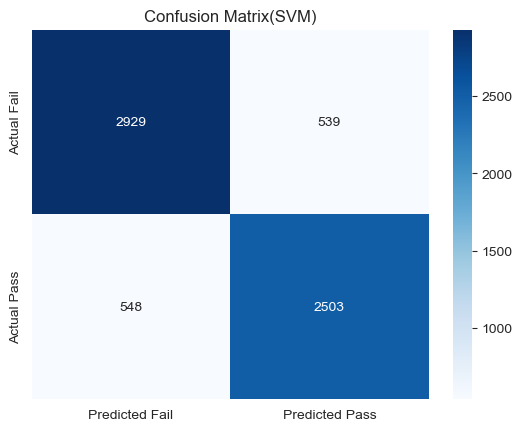

In [215]:
sns.heatmap(cmSVM, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Fail', 'Predicted Pass'], yticklabels=['Actual Fail', 'Actual Pass'])

plt.title('Confusion Matrix(SVM)')
plt.show()

#### Print classification report

In [216]:
print(classification_report(y_test, SVM_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.842     0.845     0.843      3468
           1      0.823     0.820     0.822      3051

    accuracy                          0.833      6519
   macro avg      0.833     0.832     0.833      6519
weighted avg      0.833     0.833     0.833      6519



#### Convert to list

In [217]:
SVMlist = SVM_predictions.tolist()

In [218]:
SVM_test_results = X_test.copy()

In [219]:
SVM_test_results['SVM_actual'] = y_test['final_result'].apply(lambda x: 'Fail' if x == 0 else 'Pass')
SVM_test_results['SVM_predicted'] = SVMlist
SVM_test_results['SVM_predicted'] = SVM_test_results['SVM_predicted'].apply(lambda x: 'Fail' if x == 0 else 'Pass')
SVM_test_results['id_student'] = le.inverse_transform(X_test['id_student'])

In [220]:
SVM_results = pd.DataFrame(SVM_test_results[['id_student', 'SVM_actual', 'SVM_predicted']])

print(SVM_results)

       id_student SVM_actual SVM_predicted
21105     2632165       Pass          Pass
30047     2678580       Fail          Fail
7302       642122       Pass          Pass
12840     1101190       Pass          Pass
29147      656579       Pass          Pass
...           ...        ...           ...
22898      505002       Fail          Fail
23582      556133       Pass          Pass
28963      650923       Pass          Pass
4252       602598       Fail          Fail
21428      605541       Fail          Fail

[6519 rows x 3 columns]


In [221]:
match_count = (SVM_results['SVM_actual'] == SVM_results['SVM_predicted'] ).sum()

print('Number of matches:', match_count)

Number of matches: 5432


In [222]:
SVM_results.to_csv('SVM_Predicted_Result.csv')

### Create df for all prediction results

In [223]:
# Reset indices of input variables
RF_results.reset_index(drop=True, inplace=True)
ANN_result.reset_index(drop=True, inplace=True)
SVM_results.reset_index(drop=True, inplace=True)

# Combine predictions into final DataFrame
df_final_results = pd.concat([RF_results['RF_predicted'], ANN_result['ANN_predicted'], SVM_results['SVM_predicted']], axis=1)
df_final_results.columns = ['Random Forest', 'ANN', 'SVM']

print(df_final_results)

     Random Forest   ANN   SVM
0             Pass  Pass  Pass
1             Fail  Fail  Fail
2             Pass  Pass  Pass
3             Pass  Pass  Pass
4             Pass  Pass  Pass
...            ...   ...   ...
6514          Fail  Fail  Fail
6515          Pass  Pass  Pass
6516          Pass  Pass  Pass
6517          Fail  Fail  Fail
6518          Fail  Fail  Fail

[6519 rows x 3 columns]


In [224]:
df_final_results.to_csv('FinalResult.csv')

## Part 2: Predict dropout of students 

In this part, the 60% of the data will be trained to predict 40%  of dropout of students from studies.

#### Set target and features

In [225]:
target_dropout  = data_dropout['dropout']
feature_dropout = data_dropout.drop('dropout', axis=1)

#### Assign to train and test

In [226]:
train_dropout = pd.DataFrame(feature_dropout)
test_dropout = pd.DataFrame(target_dropout)

#### Split dataset into train, validate and test data

In [227]:
####60% training 20% test and 20% validation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_dropout, test_dropout,
    test_size=0.2, shuffle = True, random_state = 42)

#validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
   test_size=0.25, random_state= 42) #0.25*0.8=0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (19555, 9)
X_test shape: (6519, 9)
y_train shape: (19555, 1)
y_test shape: (6519, 1)
X_val shape: (19555, 1)
y val shape: (6519, 1)


### Model 1: Random Forest 

#### Build RF model

In [228]:
random_forest_model = RandomForestClassifier(n_estimators=120, random_state=42)

RFstart_time = time.time()

random_forest_model.fit(X_train, y_train)

RFend_time = time.time()

RFelapsed_time = RFend_time - RFstart_time

#### Make Predictions

In [229]:
RFpredictions = random_forest_model.predict(X_test)
RFpredictions

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

#### Model Evaluation 

In [230]:
#Accuracy
print('\033[1mAccuracy\033[0m')
print("The test accuracy of Random Forest model is ", ((accuracy_score(y_test, RFpredictions)*100)),"%.")
print("The validation accuracy of Random Forest model is ",((random_forest_model.score(X_val, y_val)*100)),"%.\n")

#Precision
print('\033[1mPrecision\033[0m')
print("The precision of Random Forest model is ",((metrics.precision_score(y_test, RFpredictions)*100)),"%.\n")

# Recall
print('\033[1mRecall\033[0m')
print("The precision of Random Forest model is ",((metrics.recall_score(y_test, RFpredictions)*100)),"%.\n")

print('\033[1mTime taken for training\033[0m')
print("Time taken for RF model training is ",RFelapsed_time,"seconds.")

Accuracy
The test accuracy of Random Forest model is  82.32857800276115 %.
The validation accuracy of Random Forest model is  82.63537352354655 %.

Precision
The precision of Random Forest model is  69.72609322441134 %.

Recall
The precision of Random Forest model is  73.54282818043588 %.

Time taken for training
Time taken for RF model training is  2.877232789993286 seconds.


#### Confusion Matrix 

In [231]:
cmRF=confusion_matrix(y_test, RFpredictions)
cmRF

array([[3916,  630],
       [ 522, 1451]], dtype=int64)

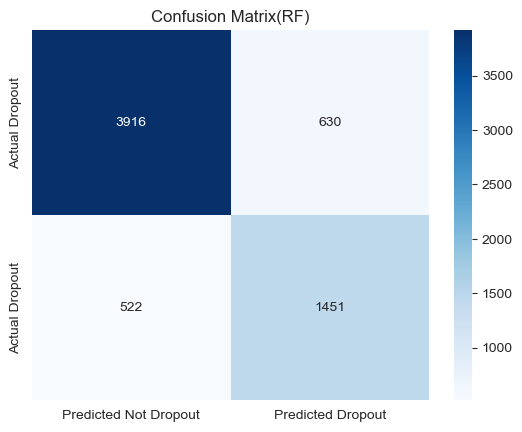

In [232]:
sns.heatmap(cmRF, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Dropout', 'Predicted Dropout'], yticklabels=['Actual Dropout', 'Actual Dropout'])

plt.title('Confusion Matrix(RF)')
plt.show()

#### Print Classification Report 

In [233]:
print(classification_report(y_test, RFpredictions, digits=3))

              precision    recall  f1-score   support

           0      0.882     0.861     0.872      4546
           1      0.697     0.735     0.716      1973

    accuracy                          0.823      6519
   macro avg      0.790     0.798     0.794      6519
weighted avg      0.826     0.823     0.825      6519



#### Convert to list

In [234]:
RFlist = RFpredictions.tolist()

In [235]:
RF_test_dropout = X_test.copy()

In [236]:
RF_test_dropout['RF_actual'] = y_test['dropout'].apply(lambda x: 'Not Dropout' if x == 0 else 'Dropout')
RF_test_dropout['RF_predicted'] = RFlist
RF_test_dropout['RF_predicted'] = RF_test_dropout['RF_predicted'].apply(lambda x: 'Not Dropout' if x == 0 else 'Dropout')
RF_test_dropout['id_student'] = le.inverse_transform(X_test['id_student'])

In [237]:
RF_dropout = pd.DataFrame(RF_test_dropout[['id_student', 'RF_actual', 'RF_predicted']])

print(RF_dropout)

       id_student    RF_actual RF_predicted
21105     2632165  Not Dropout  Not Dropout
30047     2678580      Dropout      Dropout
7302       642122  Not Dropout  Not Dropout
12840     1101190  Not Dropout  Not Dropout
29147      656579  Not Dropout  Not Dropout
...           ...          ...          ...
22898      505002  Not Dropout  Not Dropout
23582      556133  Not Dropout  Not Dropout
28963      650923  Not Dropout  Not Dropout
4252       602598  Not Dropout      Dropout
21428      605541  Not Dropout      Dropout

[6519 rows x 3 columns]


In [238]:
match_count = (RF_dropout['RF_actual'] == RF_dropout['RF_predicted'] ).sum()

print('Number of matches:', match_count)

Number of matches: 5367


In [239]:
RF_dropout.to_csv('RF_predicted_dropout.csv')

#### Rank Top Risk of Dropout Students 

In [240]:
# Predict probability of attrition for each employee
probs = random_forest_model.predict_proba(X_test)

# Extract probability of class "Attrition = 1"
probs = probs[:, 1]

X_test_extend=X_test.copy()
# Add probability column to dataframe
X_test_extend["Dropout_Prob"] = probs

# Sort dataframe by probability and select top employees with highest risk of attrition
top_risk = X_test_extend.sort_values("Dropout_Prob", ascending=False)

top_risk

,id_student,imd_band,studied_credits,final_result,sum_click,After_Clicks,Before_Clicks,date_registration,module_presentation_length,Dropout_Prob
3826,13707,5,120,0,1355.039654,1281.550294,73.48936,72.0,268,1.0
5915,19354,1,60,0,1355.039654,1281.550294,73.48936,52.0,234,1.0
15824,15347,5,90,0,1355.039654,1281.550294,73.48936,57.0,261,1.0
23189,8756,8,60,0,1355.039654,1281.550294,73.48936,93.0,240,1.0
26656,11259,0,120,0,1355.039654,1281.550294,73.48936,106.0,241,1.0
...,...,...,...,...,...,...,...,...,...,...
28544,20155,5,90,1,3154.000000,3111.000000,43.00000,25.0,269,0.0
19204,26285,2,60,1,917.000000,844.000000,73.00000,80.0,262,0.0
24443,6876,0,60,1,3302.000000,3214.000000,88.00000,100.0,268,0.0
11127,7300,10,30,1,839.000000,796.000000,43.00000,32.0,269,0.0


In [241]:
top_risk.to_csv('RF_Dropout_Top_Rank.csv')

#### Features Importance 

In [242]:
importance = pd.concat([pd.DataFrame(X_train.columns),
                          pd.DataFrame(np.transpose(random_forest_model.feature_importances_))], axis = 1)
importance.columns = ['Features', 'Coefficient']
importance = importance.sort_values('Coefficient', ascending=False)
importance

,Features,Coefficient
3,final_result,0.303020
5,After_Clicks,0.148483
4,sum_click,0.139835
0,id_student,0.100906
7,date_registration,0.093018
6,Before_Clicks,0.085046
1,imd_band,0.050633
8,module_presentation_length,0.039783
2,studied_credits,0.039275


In [243]:
importance.to_csv('RF_dropout_featuresimportance.csv')

### Model 2: Artificial Neural Network 

#### Build ANN Model 

In [244]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the model architecture
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=9))
model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ANNstart_time = time.time()

# Train the model on the training data
model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_val, y_val))

ANNend_time = time.time()

ANNelapsed_time = ANNend_time - ANNstart_time

Epoch 1/80
612/612 [==============================] - 2s 2ms/step - loss: 18.8194 - accuracy: 0.6353 - val_loss: 41.0324 - val_accuracy: 0.6875
Epoch 2/80
612/612 [==============================] - 1s 2ms/step - loss: 11.0369 - accuracy: 0.6483 - val_loss: 9.0642 - val_accuracy: 0.5010
Epoch 3/80
612/612 [==============================] - 1s 2ms/step - loss: 8.9096 - accuracy: 0.6522 - val_loss: 5.0626 - val_accuracy: 0.6604
Epoch 4/80
612/612 [==============================] - 1s 2ms/step - loss: 8.8920 - accuracy: 0.6656 - val_loss: 27.1150 - val_accuracy: 0.4843
Epoch 5/80
612/612 [==============================] - 1s 2ms/step - loss: 9.0224 - accuracy: 0.6625 - val_loss: 2.7324 - val_accuracy: 0.7408
Epoch 6/80
612/612 [==============================] - 1s 2ms/step - loss: 8.4423 - accuracy: 0.6636 - val_loss: 2.6260 - val_accuracy: 0.7131
Epoch 7/80
612/612 [==============================] - 1s 2ms/step - loss: 5.8847 - accuracy: 0.6770 - val_loss: 23.2318 - val_accuracy: 0.3422
E

612/612 [==============================] - 1s 2ms/step - loss: 0.5219 - accuracy: 0.7724 - val_loss: 0.3509 - val_accuracy: 0.8153
Epoch 59/80
612/612 [==============================] - 2s 3ms/step - loss: 0.5559 - accuracy: 0.7696 - val_loss: 0.4446 - val_accuracy: 0.7438
Epoch 60/80
612/612 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.7773 - val_loss: 0.7047 - val_accuracy: 0.7231
Epoch 61/80
612/612 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.7778 - val_loss: 0.5947 - val_accuracy: 0.7817
Epoch 62/80
612/612 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.7749 - val_loss: 0.4069 - val_accuracy: 0.8017
Epoch 63/80
612/612 [==============================] - 1s 2ms/step - loss: 0.4529 - accuracy: 0.7797 - val_loss: 1.0117 - val_accuracy: 0.6728
Epoch 64/80
612/612 [==============================] - 1s 2ms/step - loss: 0.4623 - accuracy: 0.7762 - val_loss: 0.3586 - val_accuracy: 0.8006
Epoch 65/80

#### Make Predictions 

In [245]:
ANNpredictions = model.predict(X_test)

print(ANNpredictions)

204/204 [==============================] - 0s 1ms/step
[[0.00760943]
 [0.4425214 ]
 [0.03652485]
 ...
 [0.07526853]
 [0.80834526]
 [0.49217355]]


#### Model Evaluation 

Since binary, set threshold to 0.5 to round off.

In [246]:
threshold = 0.5
predictions_binary = (ANNpredictions > threshold).astype(int)

predictions_binary = predictions_binary.astype(int)

In [247]:
#Accuracy
print('\033[1mAccuracy\033[0m')
print("The test accuracy of ANN model is ", (model.evaluate(X_test, y_test)[1])*100,"%.")
print("The validation accuracy of ANN model is ",((model.evaluate(X_val, y_val)[1]*100)),"%.\n")

#Precision
print('\033[1mPrecision\033[0m')
print("The precision of ANN model is ",((metrics.precision_score(y_test, predictions_binary)*100)),"%.\n")

# Recall
print('\033[1mRecall\033[0m')
print("The precision of ANN model is ",((metrics.recall_score(y_test, predictions_binary)*100)),"%.\n")

print('\033[1mTime taken for training\033[0m')
print("Time taken for ANN model training is ",ANNelapsed_time,"seconds.")

Accuracy
204/204 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8044
The test accuracy of ANN model is  80.44178485870361 %.
204/204 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8175
The validation accuracy of ANN model is  81.74566626548767 %.

Precision
The precision of ANN model is  62.81204111600588 %.

Recall
The precision of ANN model is  86.72072985301571 %.

Time taken for training
Time taken for ANN model training is  102.57291007041931 seconds.


#### Confusion Matrix 

In [248]:
cmANN = confusion_matrix(y_test, predictions_binary)
cmANN

array([[3533, 1013],
       [ 262, 1711]], dtype=int64)

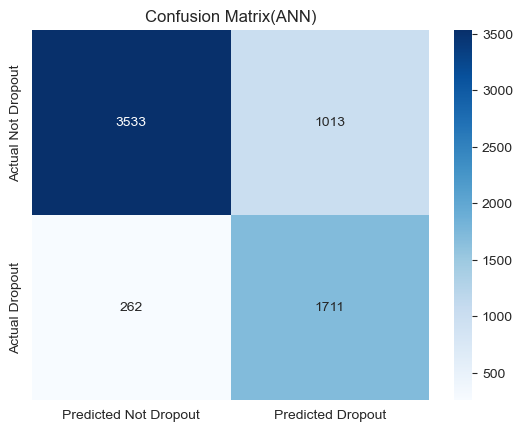

In [249]:
sns.heatmap(cmANN, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Dropout', 'Predicted Dropout'], yticklabels=['Actual Not Dropout', 'Actual Dropout'])

plt.title('Confusion Matrix(ANN)')
plt.show()

#### Print Classification Report 

In [250]:
print(classification_report(y_test, predictions_binary, digits=3))

              precision    recall  f1-score   support

           0      0.931     0.777     0.847      4546
           1      0.628     0.867     0.729      1973

    accuracy                          0.804      6519
   macro avg      0.780     0.822     0.788      6519
weighted avg      0.839     0.804     0.811      6519



#### Convert to list 

In [251]:
ANNlist = predictions_binary.tolist()
ANN_df = pd.DataFrame(ANNlist, columns=['ANN'])

print(ANN_df)

      ANN
0       0
1       0
2       0
3       0
4       0
...   ...
6514    0
6515    0
6516    0
6517    1
6518    0

[6519 rows x 1 columns]


In [252]:
ANN_df['ANN_predicted'] = ANN_df['ANN'].apply(lambda x: 'Not Dropout' if x == 0 else 'Dropout')
ANN_df

,ANN,ANN_predicted
0,0,Not Dropout
1,0,Not Dropout
2,0,Not Dropout
3,0,Not Dropout
4,0,Not Dropout
...,...,...
6514,0,Not Dropout
6515,0,Not Dropout
6516,0,Not Dropout
6517,1,Dropout


In [253]:
ANN_test_dropout = X_test.copy()

In [254]:
ANN_test_dropout['ANN_actual'] = y_test['dropout'].apply(lambda x: 'Not Dropout' if x == 0 else 'Dropout')
ANN_test_dropout['id_student'] = le.inverse_transform(X_test['id_student'])

In [255]:
ANN_dropout = pd.concat([ANN_test_dropout[['id_student','ANN_actual']].reset_index(drop=True), ANN_df[['ANN_predicted']].reset_index(drop=True)], axis=1)
print(ANN_dropout)

      id_student   ANN_actual ANN_predicted
0        2632165  Not Dropout   Not Dropout
1        2678580      Dropout   Not Dropout
2         642122  Not Dropout   Not Dropout
3        1101190  Not Dropout   Not Dropout
4         656579  Not Dropout   Not Dropout
...          ...          ...           ...
6514      505002  Not Dropout   Not Dropout
6515      556133  Not Dropout   Not Dropout
6516      650923  Not Dropout   Not Dropout
6517      602598  Not Dropout       Dropout
6518      605541  Not Dropout   Not Dropout

[6519 rows x 3 columns]


In [256]:
match_count = (ANN_dropout['ANN_actual'] == ANN_dropout['ANN_predicted']).sum()
print('Number of matches:', match_count)

Number of matches: 5244


In [257]:
ANN_dropout.to_csv('ANN_predicted_dropout.csv')

### Model 3: Support Vector Machine 

#### Build SVM Model 

In [258]:
svm_model = SVC(kernel='linear')

SVM_start_time = time.time()

svm_model.fit(X_train, y_train)

SVM_end_time = time.time()

SVM_elapsed_time = SVM_end_time - SVM_start_time

#### Make predictions 

In [259]:
SVM_predictions = svm_model.predict(X_test)

SVM_predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Model evaluation 

In [260]:
#Accuracy
print('\033[1mAccuracy\033[0m')
print("The test accuracy of SVM model is ", ((accuracy_score(y_test, SVM_predictions)*100)),"%.")
print("The validation accuracy of SVM model is ",((svm_model.score(X_val, y_val)*100)),"%.\n")

#Precision
print('\033[1mPrecision\033[0m')
print("The precision of SVM model is ",((metrics.precision_score(y_test, SVM_predictions)*100)),"%.\n")

# Recall
print('\033[1mRecall\033[0m')
print("The precision of SVM model is ",((metrics.recall_score(y_test, SVM_predictions)*100)),"%.\n")

print('\033[1mTime taken for training\033[0m')
print("Time taken for SVM model training is ",SVM_elapsed_time,"seconds.")

Accuracy
The test accuracy of SVM model is  78.57033287314005 %.
The validation accuracy of SVM model is  79.12256481055377 %.

Precision
The precision of SVM model is  63.559322033898304 %.

Recall
The precision of SVM model is  68.42372022301065 %.

Time taken for training
Time taken for SVM model training is  1673.5474627017975 seconds.


#### Print confusion matrix 

In [261]:
cmSVM = confusion_matrix(y_test, SVM_predictions)
cmSVM

array([[3772,  774],
       [ 623, 1350]], dtype=int64)

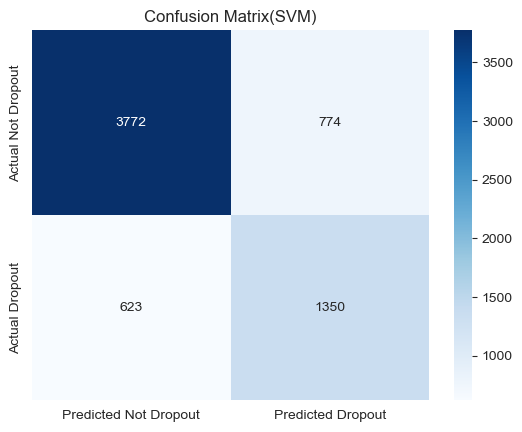

In [262]:
sns.heatmap(cmSVM, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Dropout', 'Predicted Dropout'], yticklabels=['Actual Not Dropout', 'Actual Dropout'])

plt.title('Confusion Matrix(SVM)')
plt.show()

#### Print classification report 

In [263]:
print(classification_report(y_test, SVM_predictions, digits=3))

              precision    recall  f1-score   support

           0      0.858     0.830     0.844      4546
           1      0.636     0.684     0.659      1973

    accuracy                          0.786      6519
   macro avg      0.747     0.757     0.751      6519
weighted avg      0.791     0.786     0.788      6519



#### Convert to list 

In [264]:
SVMlist = SVM_predictions.tolist()
SVMlist

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,


In [265]:
SVM_test_dropout = X_test.copy()

In [266]:
SVM_test_dropout['SVM_actual'] = y_test['dropout'].apply(lambda x: 'Not Dropout' if x == 0 else 'Dropout')
SVM_test_dropout['SVM_predicted'] = SVMlist
SVM_test_dropout['SVM_predicted'] = SVM_test_dropout['SVM_predicted'].apply(lambda x: 'Not Dropout' if x == 0 else 'Dropout')
SVM_test_dropout['id_student'] = le.inverse_transform(X_test['id_student'])

In [267]:
SVM_dropout = pd.DataFrame(SVM_test_dropout[['id_student', 'SVM_actual', 'SVM_predicted']])

print(SVM_dropout)

       id_student   SVM_actual SVM_predicted
21105     2632165  Not Dropout   Not Dropout
30047     2678580      Dropout   Not Dropout
7302       642122  Not Dropout   Not Dropout
12840     1101190  Not Dropout   Not Dropout
29147      656579  Not Dropout   Not Dropout
...           ...          ...           ...
22898      505002  Not Dropout   Not Dropout
23582      556133  Not Dropout   Not Dropout
28963      650923  Not Dropout   Not Dropout
4252       602598  Not Dropout       Dropout
21428      605541  Not Dropout   Not Dropout

[6519 rows x 3 columns]


In [268]:
match_count = (SVM_dropout['SVM_actual'] == SVM_dropout['SVM_predicted'] ).sum()

print('Number of matches:', match_count)

Number of matches: 5122


In [269]:
SVM_dropout.to_csv('SVM_Predicted_Dropout.csv')

### Create df for all prediction dropout 

In [270]:
# Reset indices of input variables
RF_dropout.reset_index(drop=True, inplace=True)
ANN_dropout.reset_index(drop=True, inplace=True)
SVM_dropout.reset_index(drop=True, inplace=True)

# Combine predictions into final DataFrame
df_final_dropout = pd.concat([RF_dropout['RF_predicted'], ANN_dropout['ANN_predicted'], SVM_dropout['SVM_predicted']], axis=1)
df_final_dropout.columns = ['Random Forest', 'ANN', 'SVM']

print(df_final_dropout)


     Random Forest          ANN          SVM
0      Not Dropout  Not Dropout  Not Dropout
1          Dropout  Not Dropout  Not Dropout
2      Not Dropout  Not Dropout  Not Dropout
3      Not Dropout  Not Dropout  Not Dropout
4      Not Dropout  Not Dropout  Not Dropout
...            ...          ...          ...
6514   Not Dropout  Not Dropout  Not Dropout
6515   Not Dropout  Not Dropout  Not Dropout
6516   Not Dropout  Not Dropout  Not Dropout
6517       Dropout      Dropout      Dropout
6518       Dropout  Not Dropout  Not Dropout

[6519 rows x 3 columns]


In [271]:
df_final_dropout.to_csv('FinalDropout.csv')